In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis
that's the question which will guide us through this whole study:\
**is the number of goal (or the class) in the match is predictible ?**
## Shape analysis
- **Shape** : 380 lines, 9 columns
- **variables types** : qualitative variable : 2, quantitative variable : 7
- **Nan** : No missing values
## Background analysis
- **Target** : 
    * global (*under 2.5*= 57%; *over 2.5*= 43%)
- **Target meaning**: 
    * For all observation, the distribution are not bell shaped, that means distribution are not Gaussian.
    * We observe that for most team, there is a little difference (mean, variance, outliers) between values recorded at home and those recorded at away but for few teams, the difference is large.\
    However the values tend to cluster around the same particular point and sometimes there is more than one cluster.
    
    `We know that the target(global) is in fact the sum between goal scored and goal conceded. so we have to look closely at the variables(scored & conceded) and see how they influence the target.`
    
    
- **Target / Feature relationship** : 
    * Target / Scored: The relationship between our two variables are positively correlated,\
    though for certain teams, there's either a week or no relationship.
    * Target / Conceded: same point of view like before.\
    It seems like match results might be highly correlated with the result of only one team \
    (*the strongest*: the goal they scored or *the weakest*: the goal they conceded ?)

- **Feature / Feature relationship**:
    * Scored / Conceded : low correlation, negative between the goal scored by a team and the goal they conceded.
    
- **Conclusion initial**:
    - There's definitely two groups identified in the data mining process:
        * Strong team ( which the match result depend more, cause of their offensive and defensive force)\
         there's a hight positive correlation between the goal they scored and the final result of the match.
        * weak team (whom conceded more than they scored) witch the final result depend more of the opponent.\
        There's a high correlation between the final result and their goal conceded.   
        * It's seems like if the match is about a strong team( good attack; good defense) and a weak team (bad attack; bad defense), the match result is highly correlated with the strong team result (scored)
    
## Hypotheses testing:
 - **H0**: There's no significant differences in Under/Over rate between strong team and weak team
 - **H1**: Strong teams seems to have more Over class than weak team.
  there's not significant differences between in under/over rate between strong & weak team   


In [2]:
from pathlib import Path
p = Path.cwd()
p = p.parent.parent / 'data' / '2022_23' / 'results' / 'ligue2.csv'
df = pd.read_csv(p, index_col='date_time', parse_dates=True)
df.head()

Unnamed: 0  journée home_team away_team  \
date_time                                                      
2023-06-02 18:45:00           0       38  Bordeaux     Rodez   
2023-06-02 18:45:00           1       38    Amiens     Laval   
2023-06-02 18:45:00           2       38  Grenoble  Guingamp   
2023-06-02 18:45:00           3       38  Le Havre     Dijon   
2023-06-02 18:45:00           4       38      Metz    Bastia   

                     1st_home_team_goal  1st_away_team_goal  \
date_time                                                     
2023-06-02 18:45:00                   0                   1   
2023-06-02 18:45:00                   0                   0   
2023-06-02 18:45:00                   0                   1   
2023-06-02 18:45:00                   1                   0   
2023-06-02 18:45:00                   1                   0   

                     total_home_team_goal  total_away_team_goal  global  
date_time                                                                
2023-06-02 18:45:00                     0                     1       1  
2023-06-02 18:45:00                     1                     2       3  
2023-06-02 18:45:00                     0                     2       2  
2023-06-02 18:45:00                     1                     0       1  
2023-06-02 18:45:00                     3                     2       5

In [3]:
df.shape

(380, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2023-06-02 18:45:00 to 2022-07-30 13:00:00
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            380 non-null    int64 
 1   journée               380 non-null    int64 
 2   home_team             380 non-null    object
 3   away_team             380 non-null    object
 4   1st_home_team_goal    380 non-null    int64 
 5   1st_away_team_goal    380 non-null    int64 
 6   total_home_team_goal  380 non-null    int64 
 7   total_away_team_goal  380 non-null    int64 
 8   global                380 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 29.7+ KB


In [5]:
# Use only columns who will be part of the study
df = df[['journée', 'home_team', 'away_team', 'total_home_team_goal', 'total_away_team_goal', 'global']]

In [6]:
# show some descriptive stats
print(f"GLOBAL:\
      total= {df['global'].sum()}; average per match= {df['global'].mean()}; \
scored by home team(conceded by away team)= {df['total_home_team_goal'].sum()}; \
scored by away_team(conceded by home_team)= {df['total_away_team_goal'].sum()}")

GLOBAL:      total= 916; average per match= 2.4105263157894736; scored by home team(conceded by away team)= 502; scored by away_team(conceded by home_team)= 414


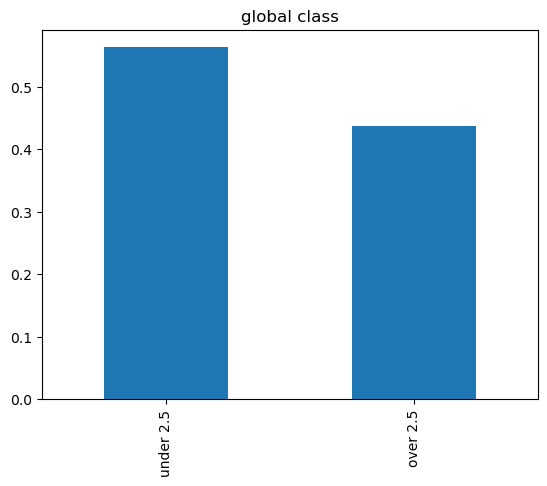

In [7]:
# we gonna cut in bins the targeting columns
df = df.copy()
labels_name = ['under 2.5', 'over 2.5']
df.loc[:,'global_class'] = pd.cut(x=df['global'], bins=[min(df['global']), 2, max(df['global'])],
       labels=labels_name, include_lowest=True)
# show histogramms to better visualize the results
plt.figure()
df['global_class'].value_counts(normalize=True).plot.bar()
plt.title('global class')
plt.show()


In [8]:
df = df.copy()
labels_name = ['under 1.5', 'over 1.5']
df.loc[:,'scored_class'] = pd.cut(x=df['total_home_team_goal'], bins=[min(df['total_home_team_goal']), 1, max(df['total_home_team_goal'])],
       labels=labels_name, include_lowest=True)
df.loc[:,'conceded_class'] = pd.cut(x=df['total_away_team_goal'], bins=[min(df['total_away_team_goal']), 1, max(df['total_away_team_goal'])],
       labels=labels_name, include_lowest=True)

In [9]:
dico = {'total_home_team_goal': 'home_team_scored',
        'total_away_team_goal': 'home_team_conceded'}
df.rename(columns=dico, inplace=True)
df['away_team_scored'] = df['home_team_conceded']
df['away_team_conceded'] = df['home_team_scored']
df.columns

Index(['journée', 'home_team', 'away_team', 'home_team_scored',
       'home_team_conceded', 'global', 'global_class', 'scored_class',
       'conceded_class', 'away_team_scored', 'away_team_conceded'],
      dtype='object')

### Data Visualisation

In [10]:

def target_viz(data, feature, team):
    """Return for home and away matchs 
    the distribution of a given feature 
    and compute mean and variance

    Args:
        data : Dataframe
        feature : the name of the column we want to visualize
        team : the team we want to observe the data
    """
    at_home = data[data['home_team']==team]
    at_away = data[data['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(7,7))
    sns.histplot(data=at_home, x=at_home[feature], kde=True, ax=axs[0],
                 discrete=True, hue=pd.cut(x=at_home['global'], bins=[min(at_home['global']), 2, max(at_home['global'])],
                              labels=['under 2.5', 'over 2.5'], include_lowest=True))
    sns.histplot(data=at_away, x=at_away[feature], kde=True, ax=axs[1],
                 discrete=True, hue=pd.cut(x=at_away['global'], bins=[min(at_away['global']), 2, max(at_away['global'])],
                              labels=['under 2.5', 'over 2.5'], include_lowest=True))
    axs[0].set_xlabel(f'{feature} at home\nµ={at_home[feature].mean()}\nstd={at_home[feature].std()}')
    axs[1].set_xlabel(f'{feature} at away\nµ={at_away[feature].mean()}\nstd={at_away[feature].std()}')
    plt.title(f"{feature} Distribution")
    plt.suptitle(f"{team}")

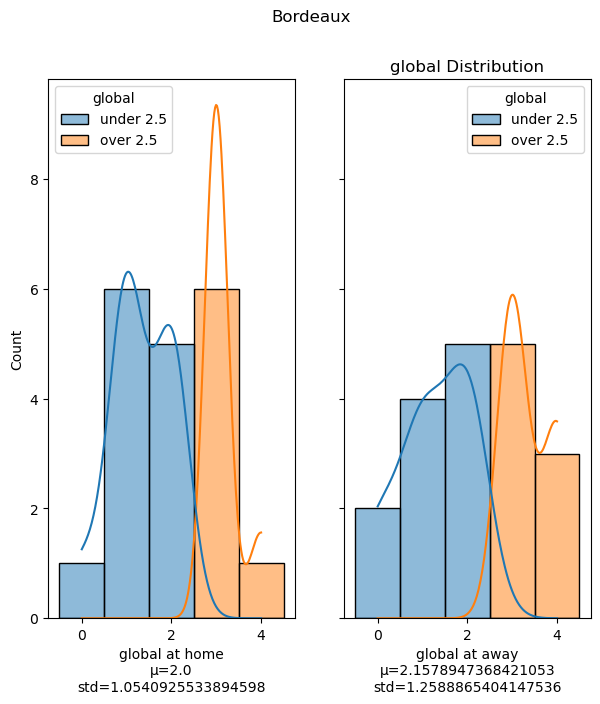

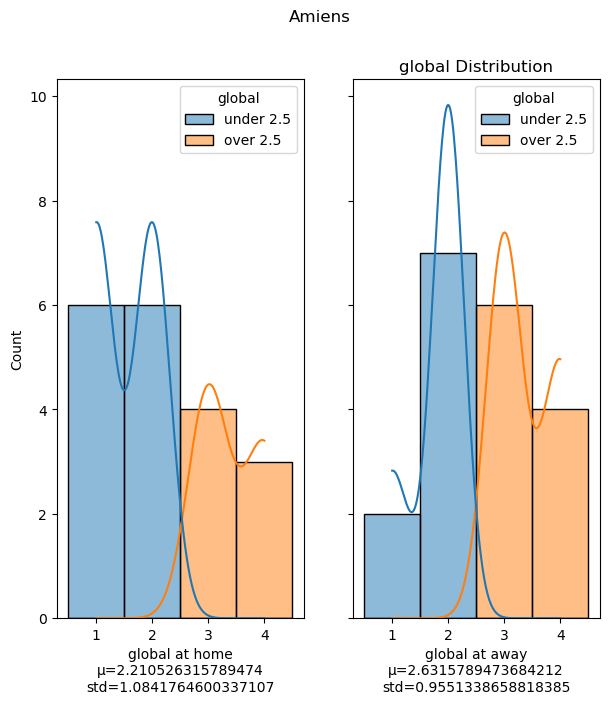

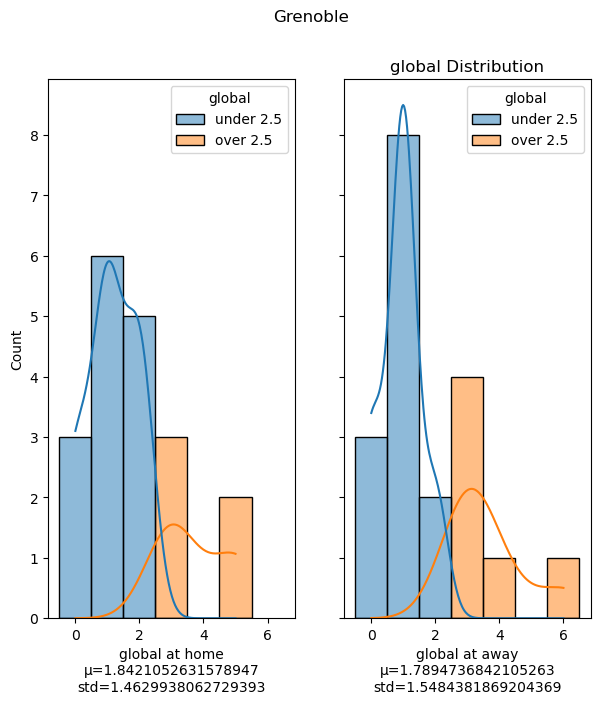

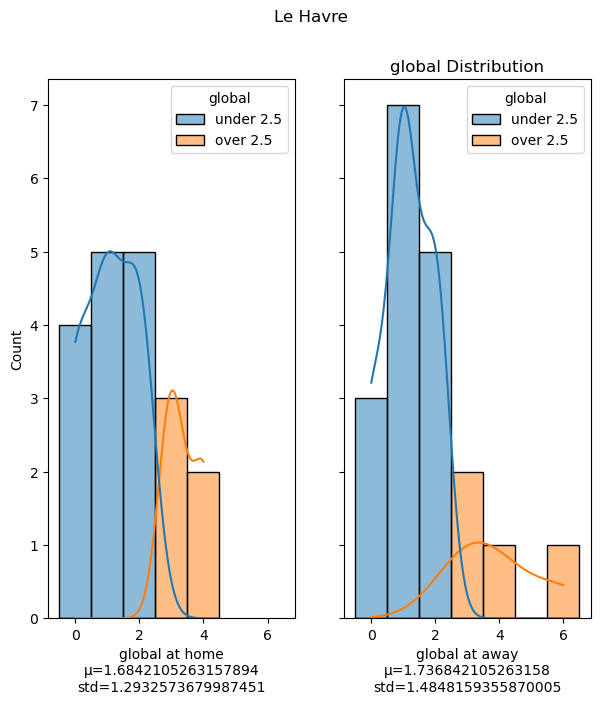

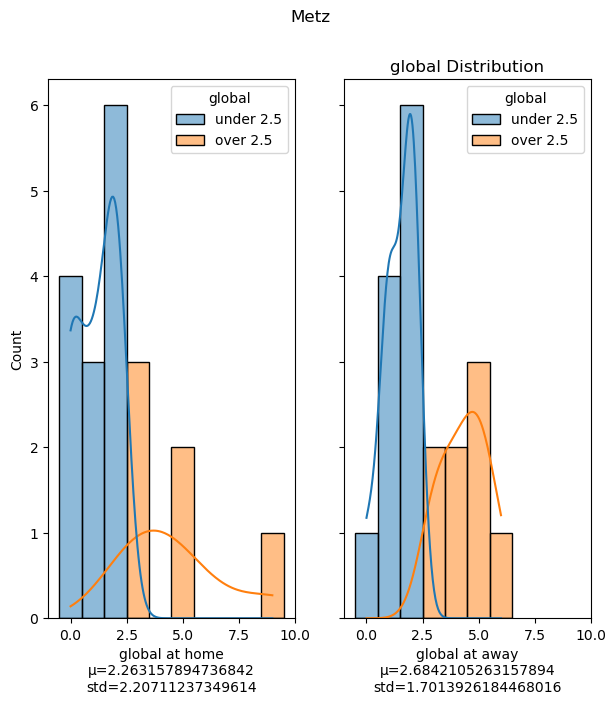

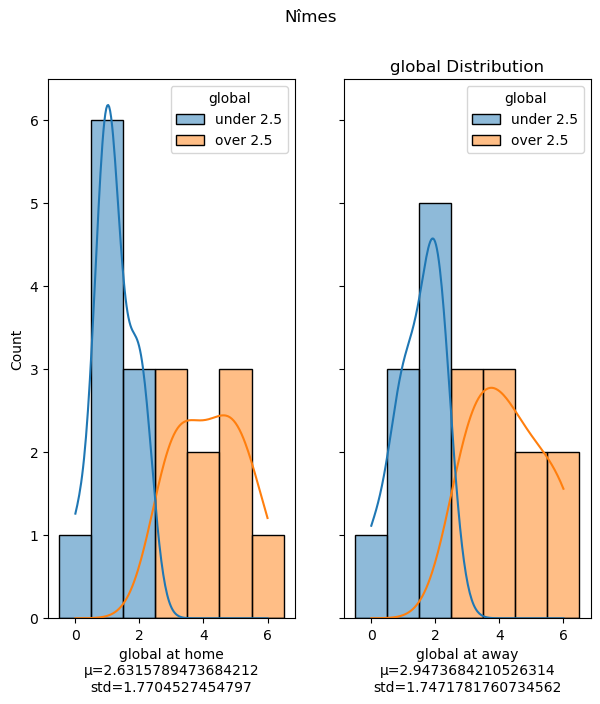

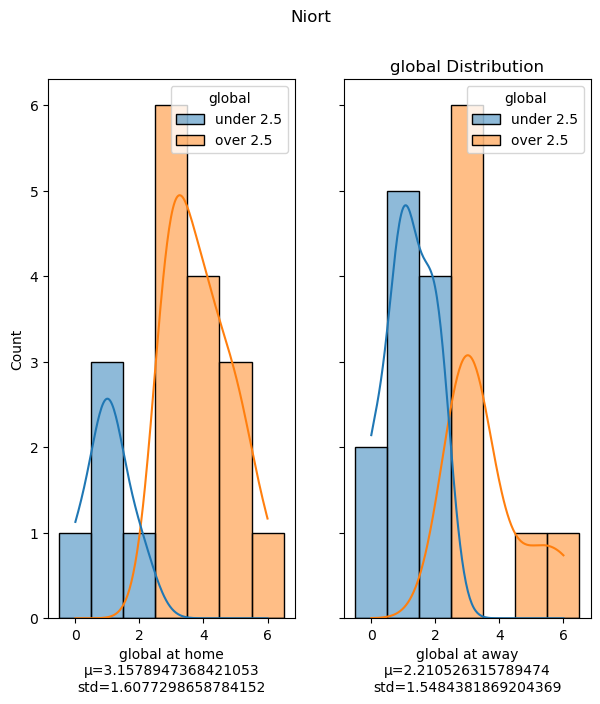

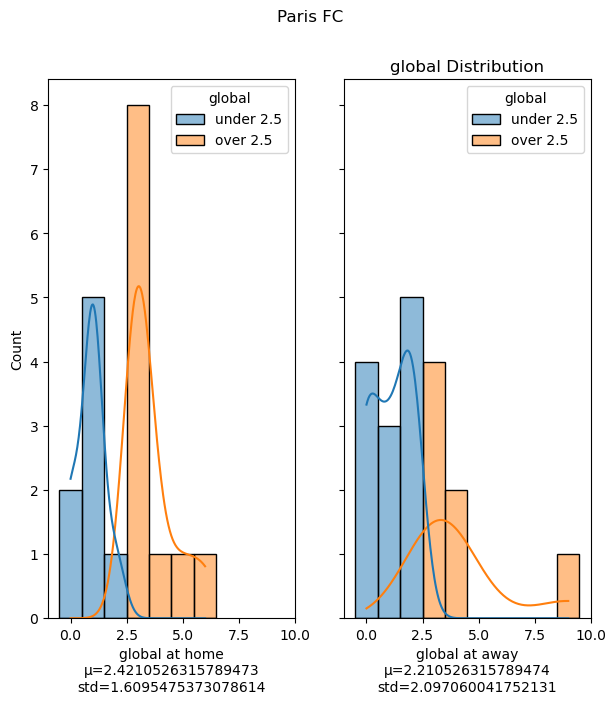

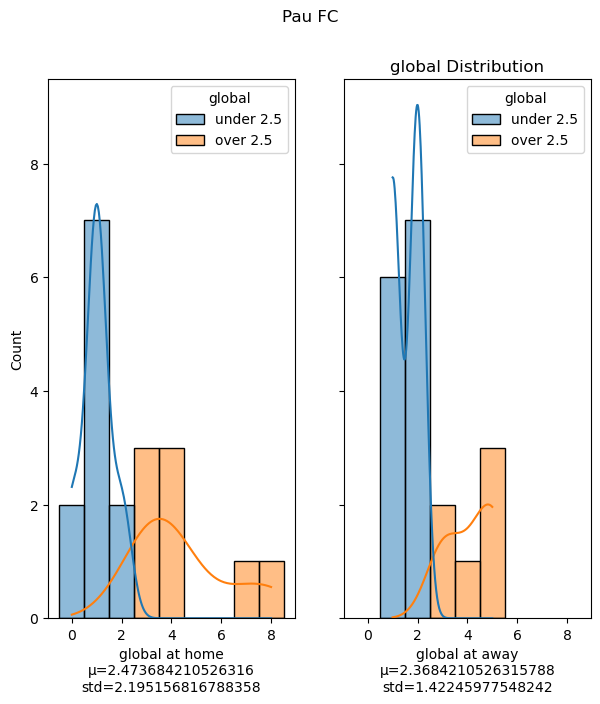

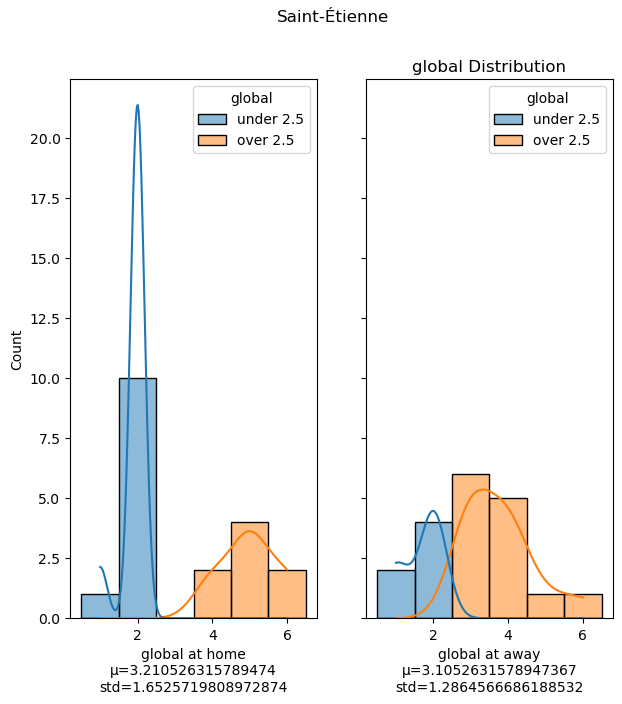

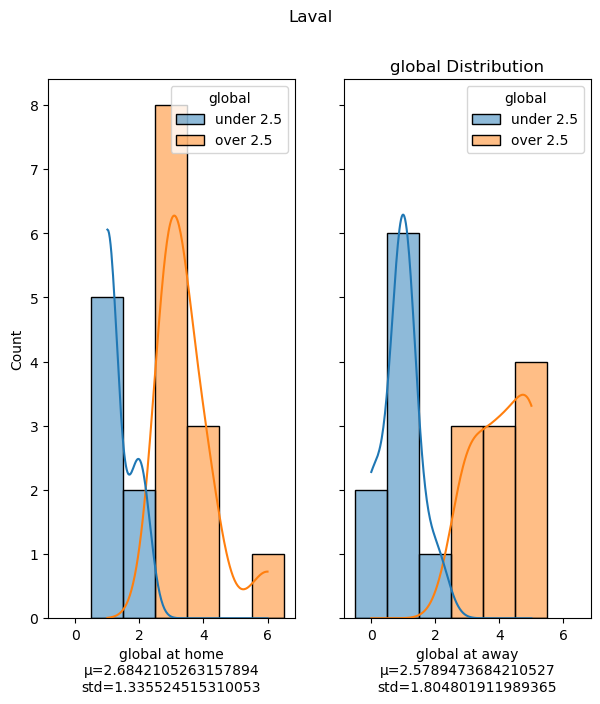

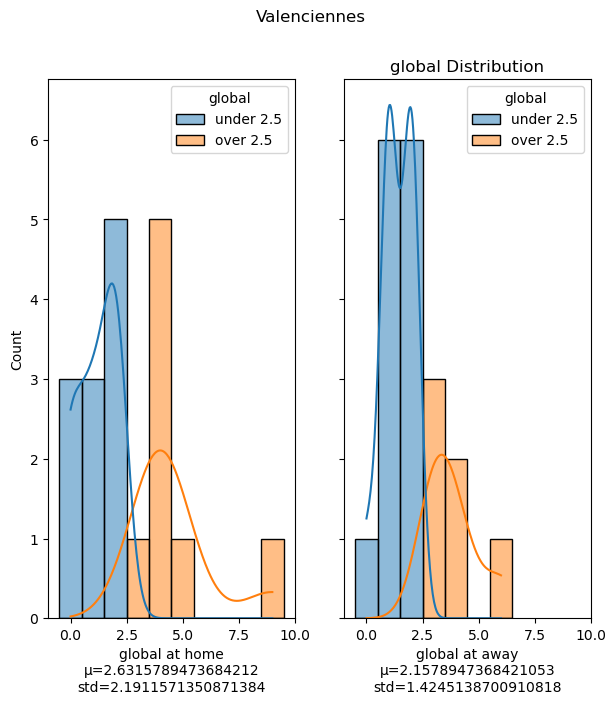

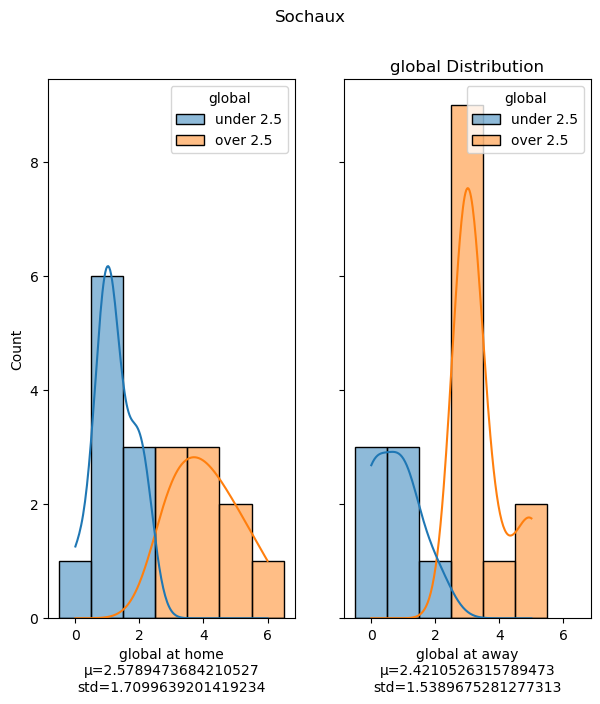

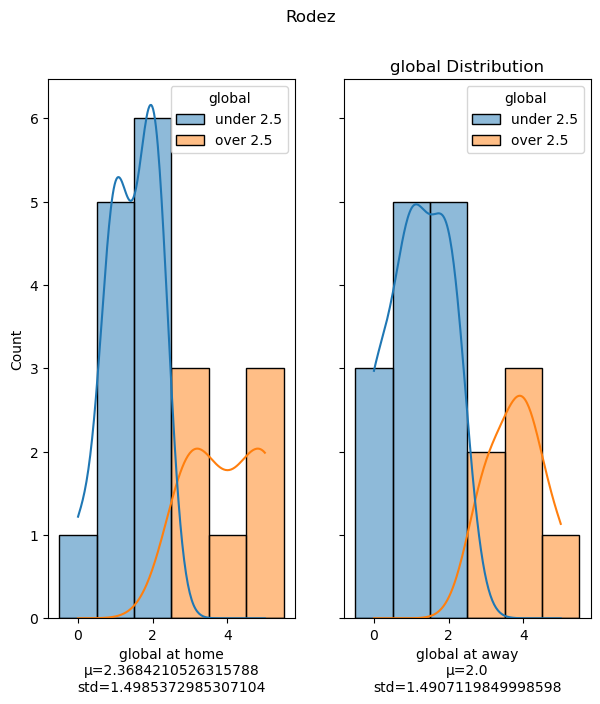

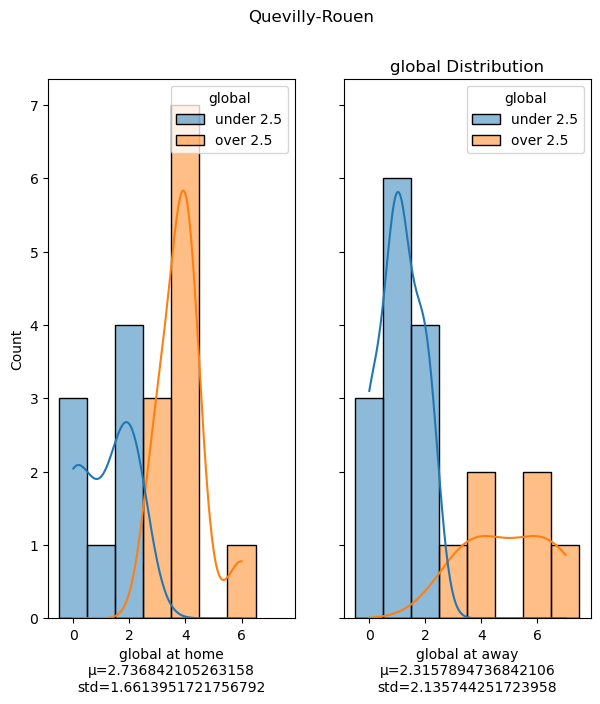

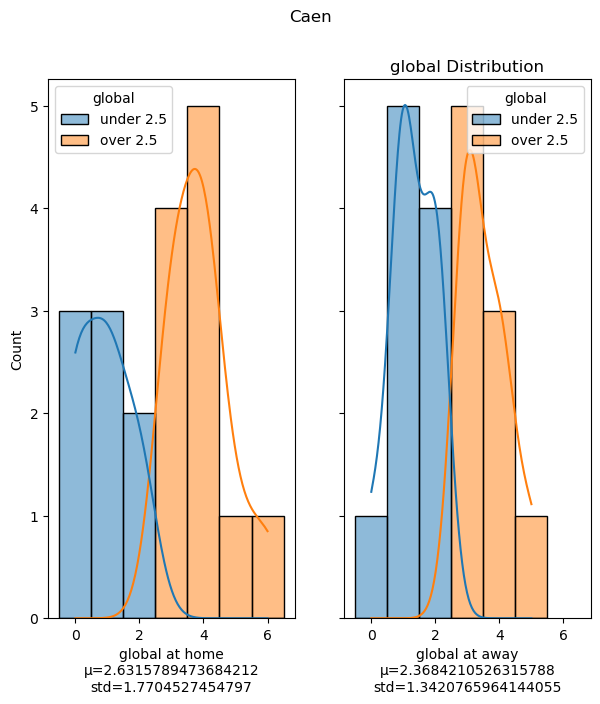

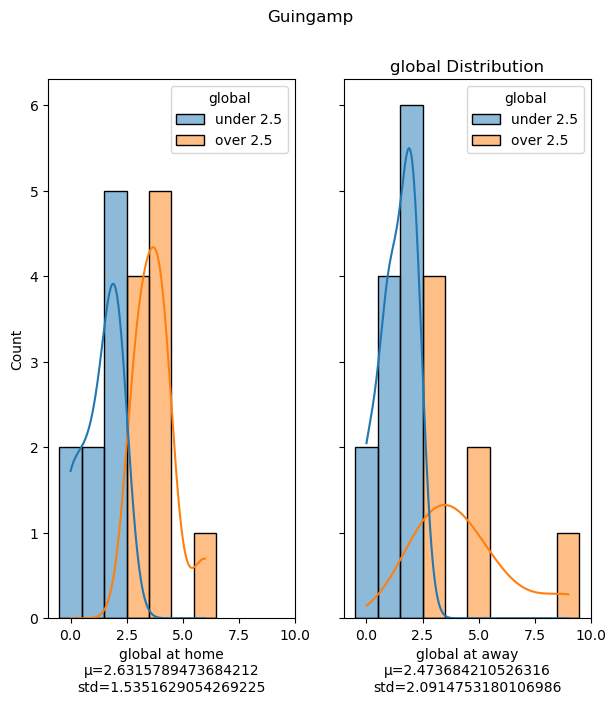

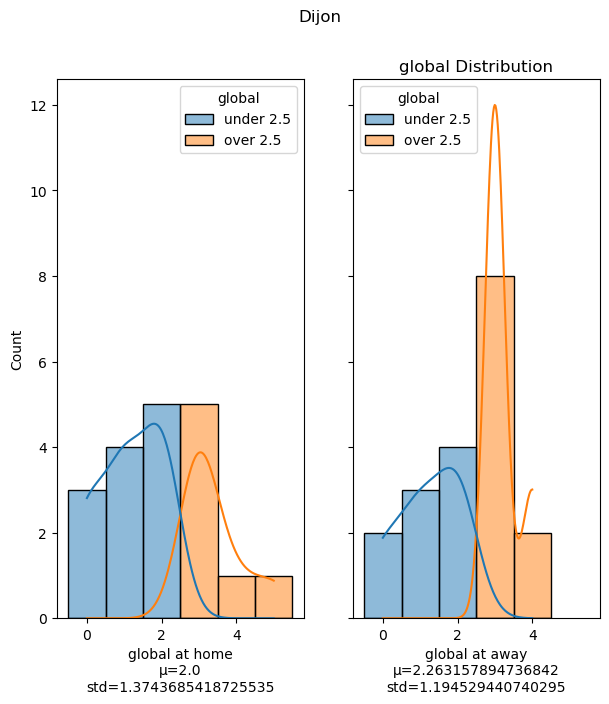

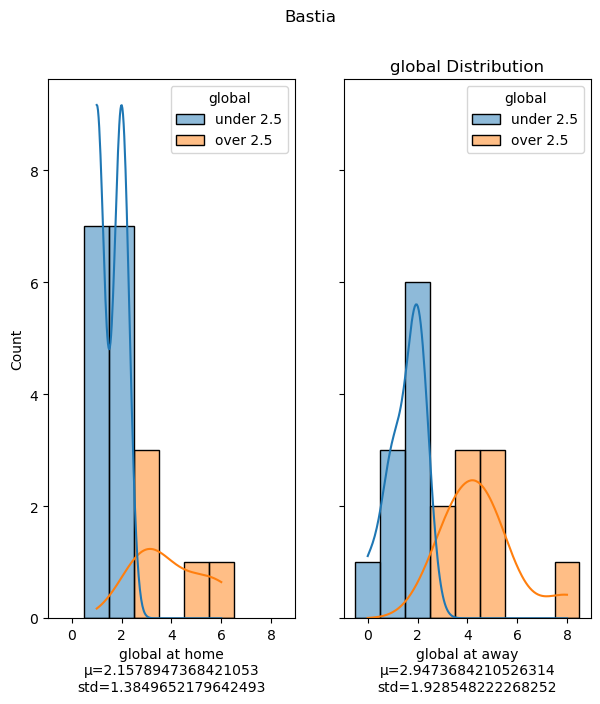

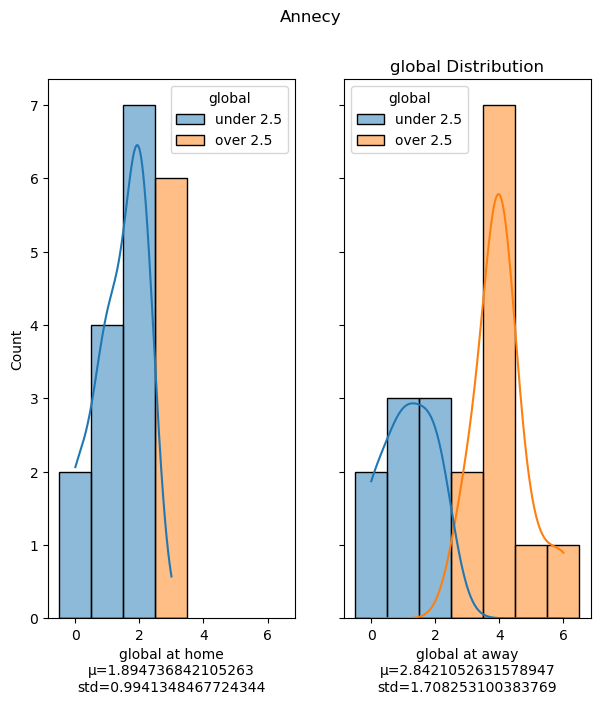

In [11]:
for team in df.home_team.unique():
    target_viz(df, feature='global', team=team)

In [12]:
def feature_viz(team, feature):
    """_summary_

    Args:
        team (str): Nom de l'équipe à étudier
        feature (str): Nom de la variable a visualiser
    """
    at_home = df[df['home_team']==team]
    at_away = df[df['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7, 5))
    sns.histplot(data=at_home, x=at_home[f'home_team_{feature}'], kde=True, ax=axs[0],
                 hue=pd.cut(x=at_home['global'], bins=[min(at_home['global']), 2, max(at_home['global'])],
                              labels=['under 2.5', 'over 2.5'], include_lowest=True), discrete=True)
    sns.histplot(data=at_away, x=at_away[f'away_team_{feature}'], kde=True, ax=axs[1],
                 hue=pd.cut(x=at_away['global'], bins=[min(at_away['global']), 2, max(at_away['global'])],
                              labels=['under 2.5', 'over 2.5'], include_lowest=True), discrete=True)
    axs[0].set_xlabel(f'{feature} at home\nµ={at_home[f"home_team_{feature}"].mean()}\nstd={at_home[f"home_team_{feature}"].std()}')
    axs[1].set_xlabel(f'{feature} at away\nµ={at_away[f"away_team_{feature}"].mean()}\nstd={at_home[f"away_team_{feature}"].std()}')
    plt.suptitle(team)
    plt.title(f"{feature} distribution")
    plt.show()

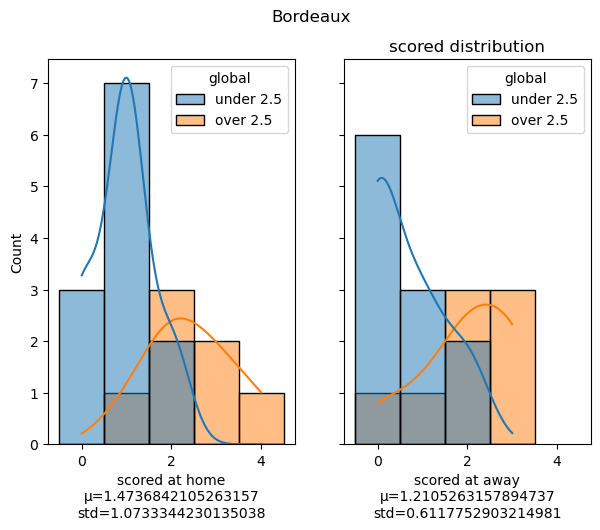

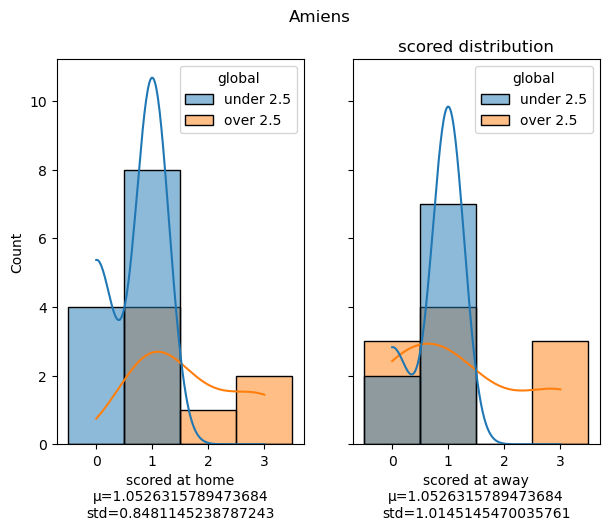

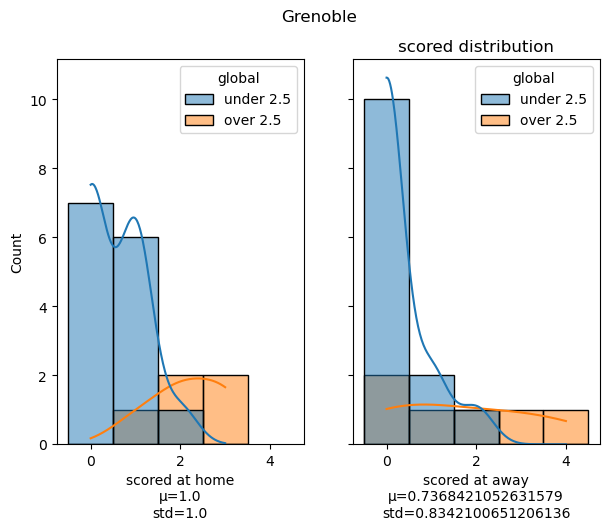

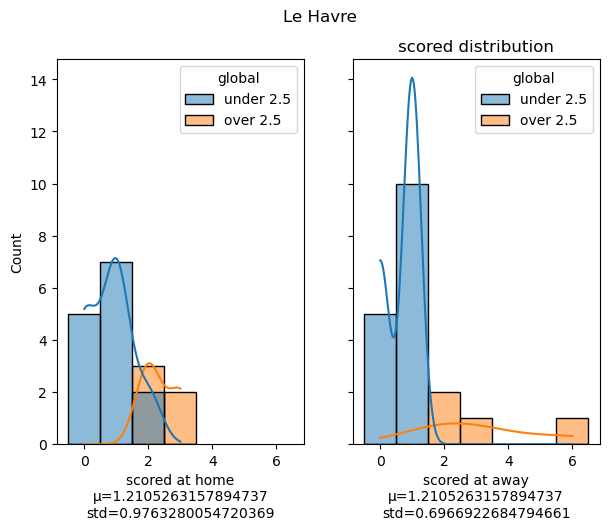

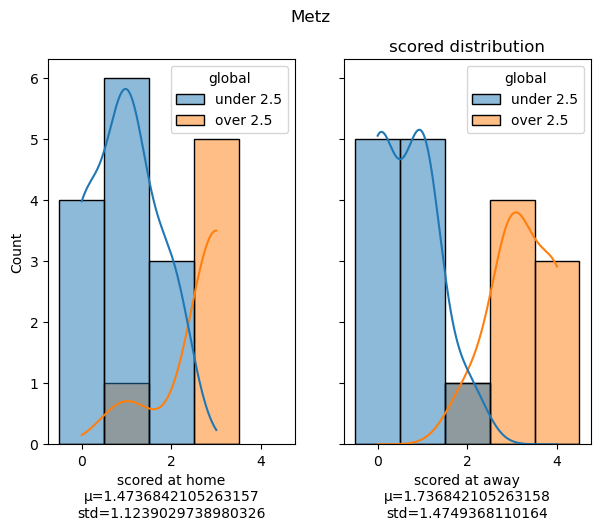

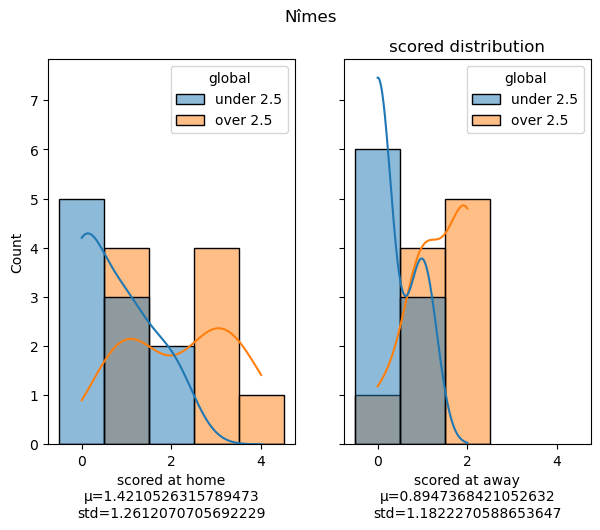

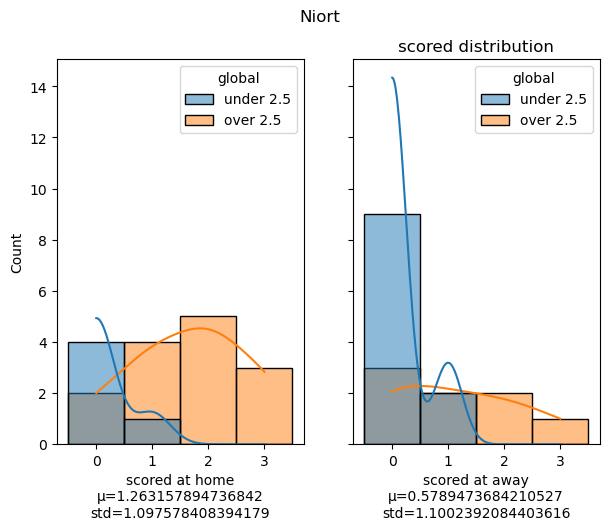

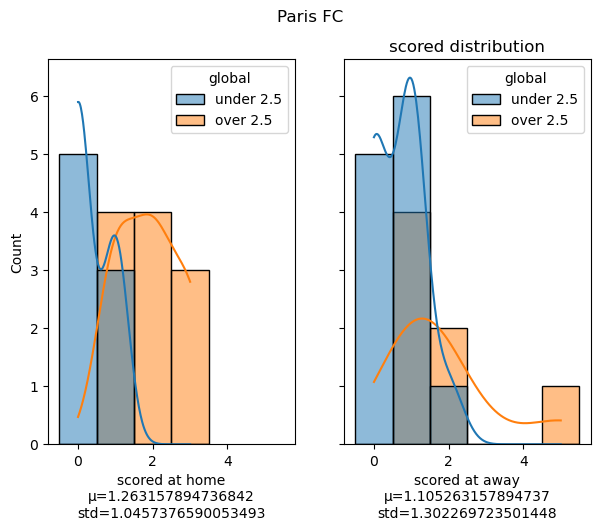

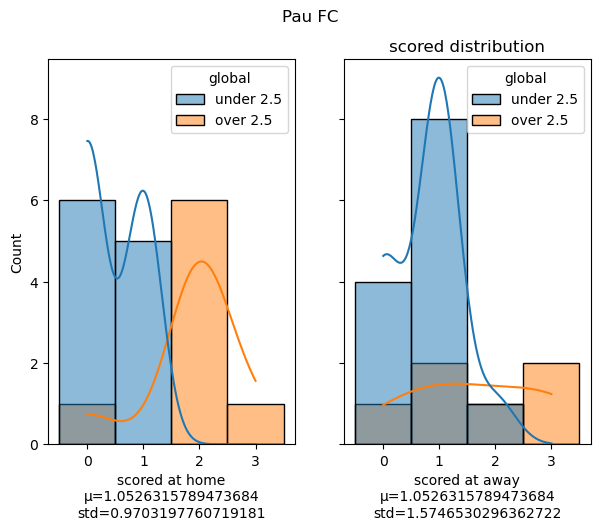

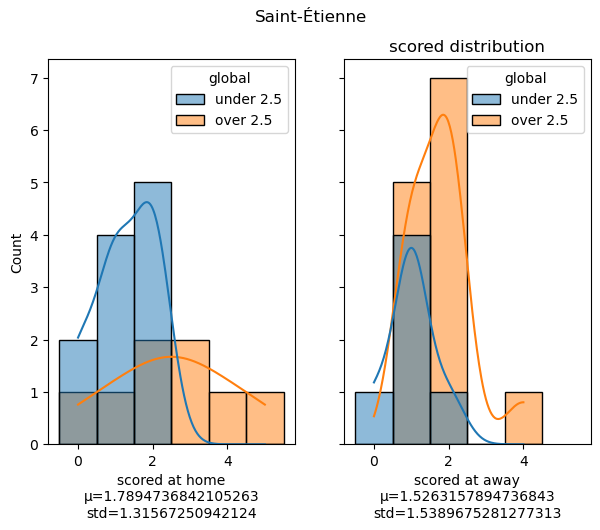

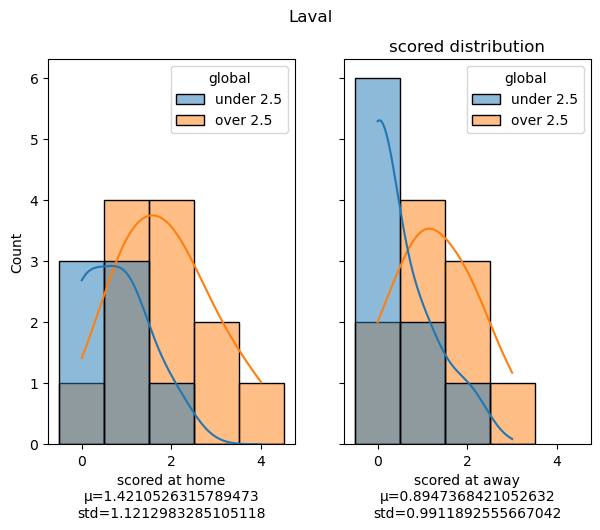

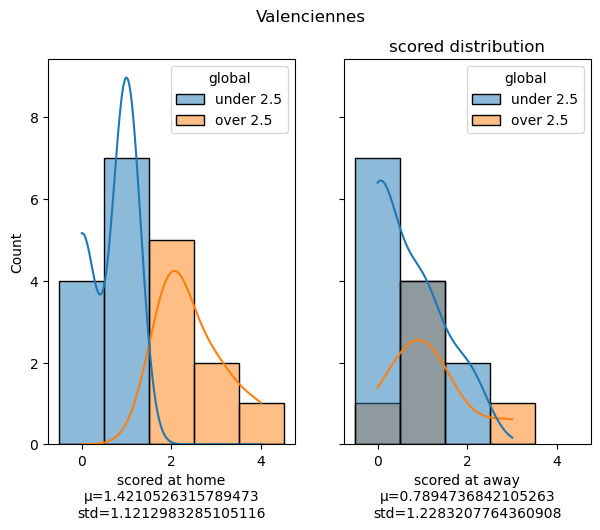

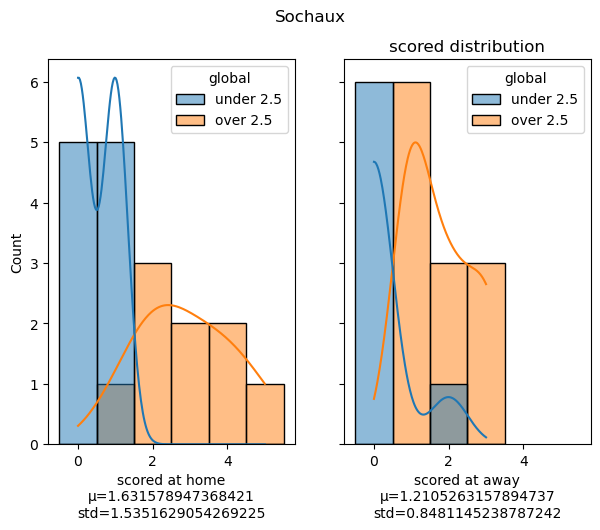

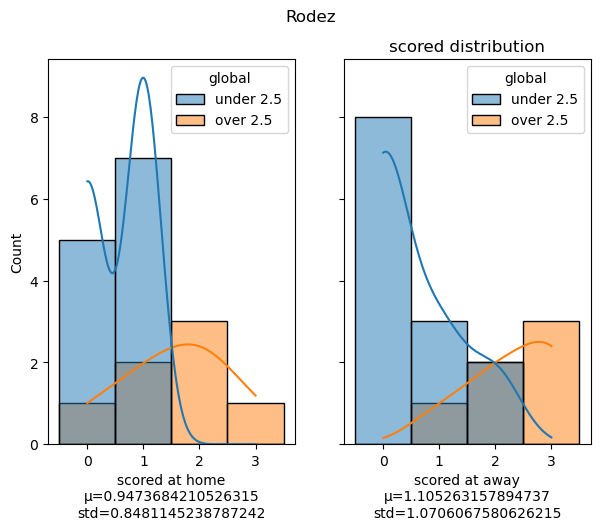

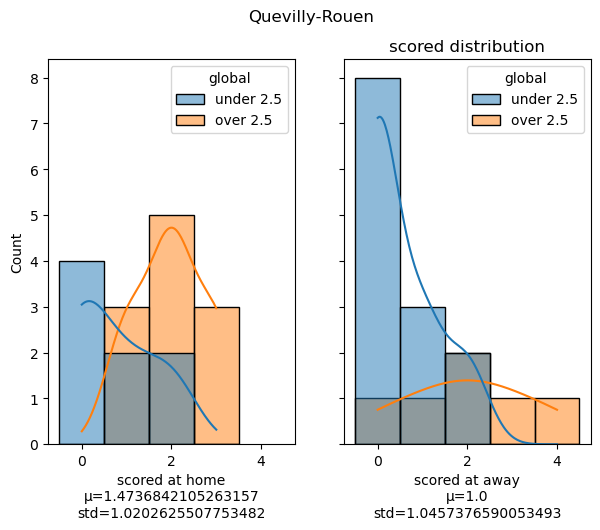

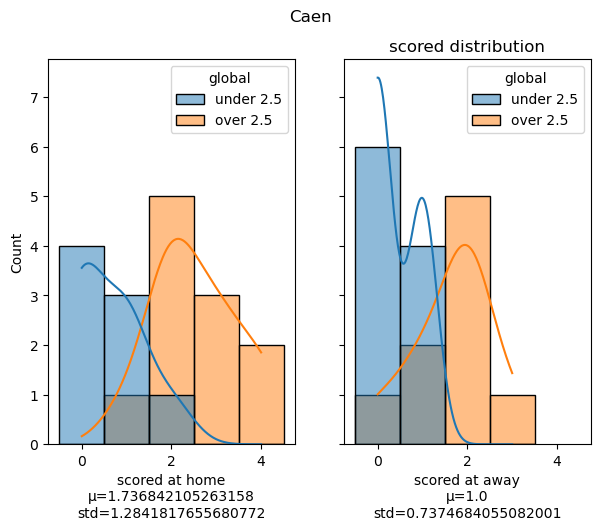

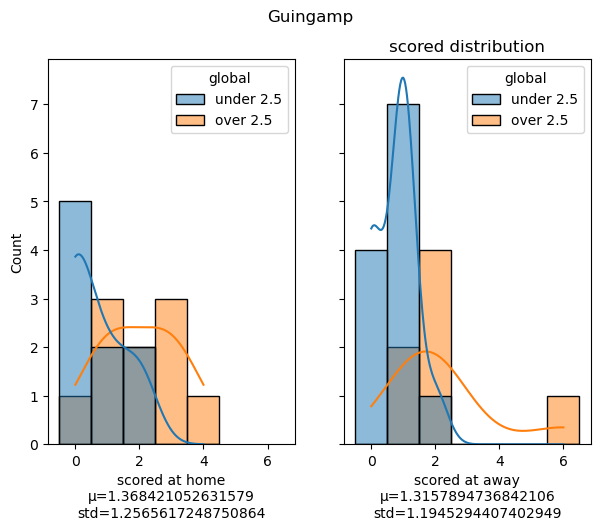

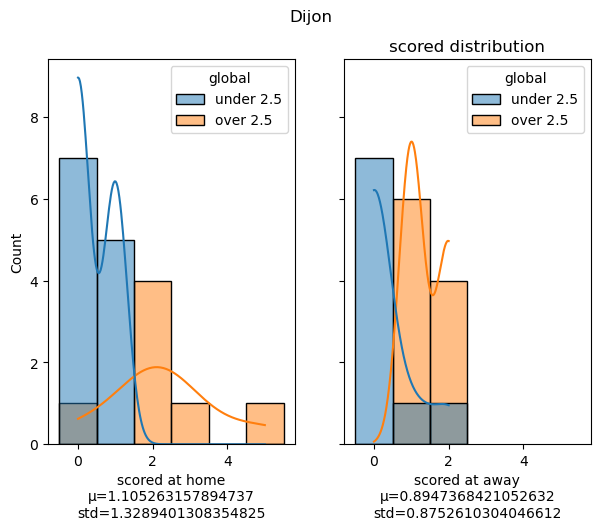

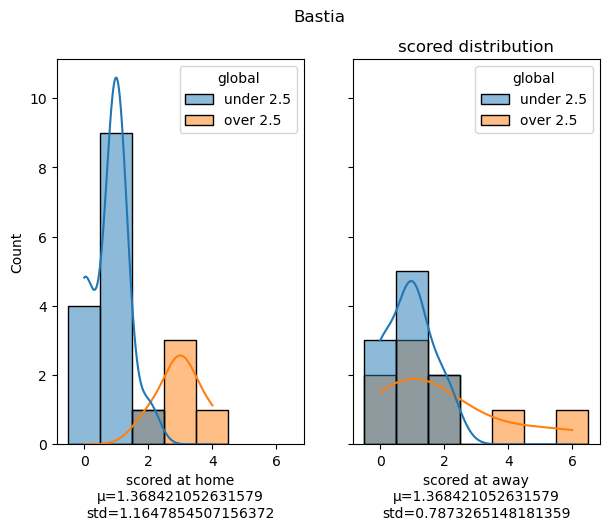

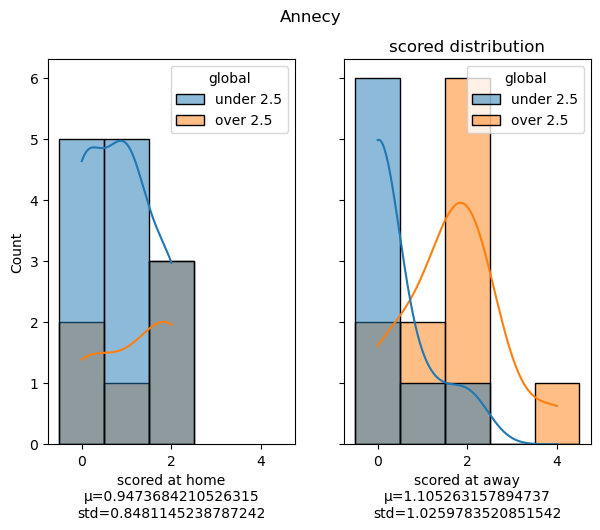

In [13]:
for team in df.home_team.unique():
    feature_viz(team, feature='scored')

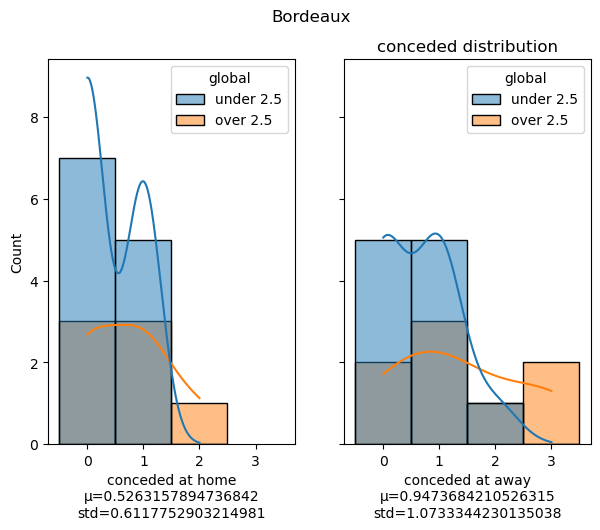

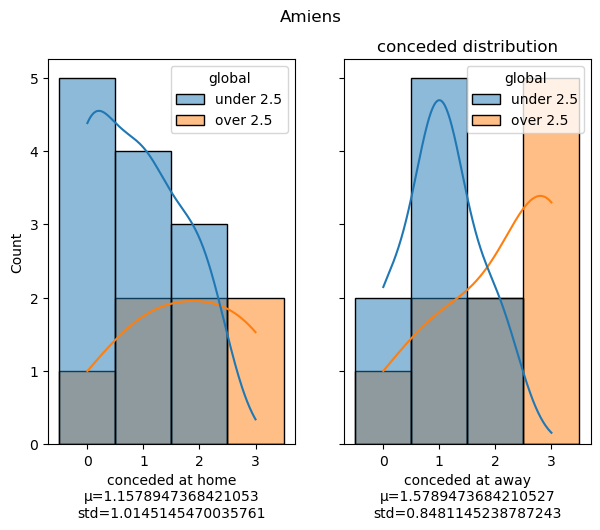

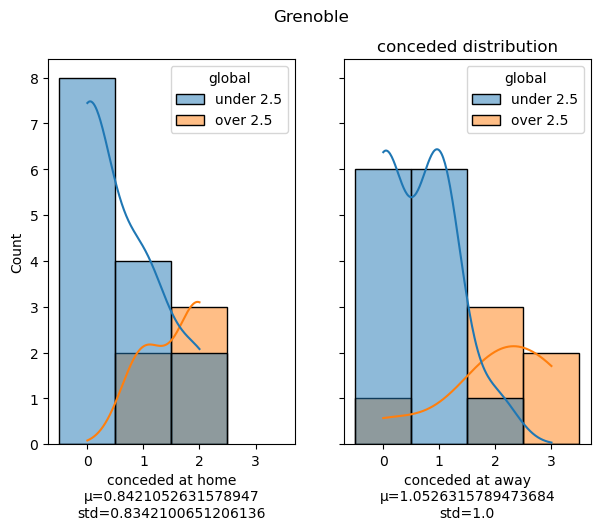

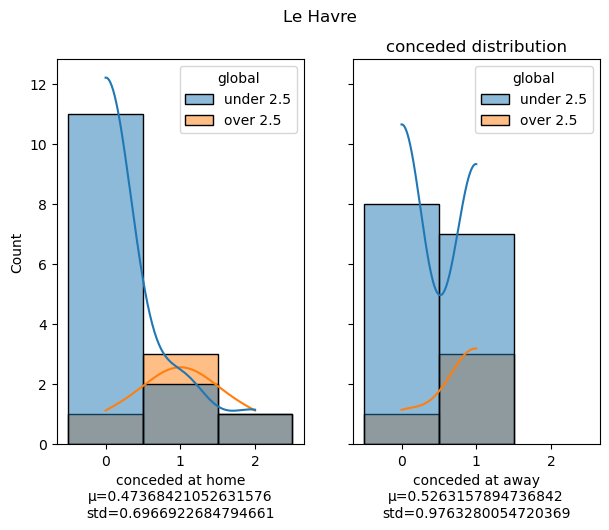

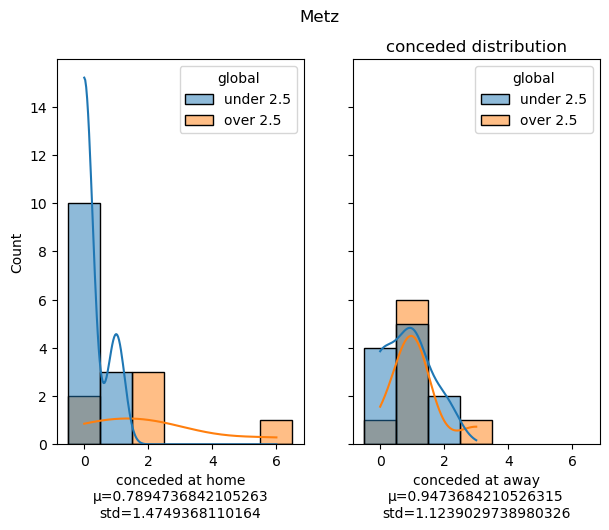

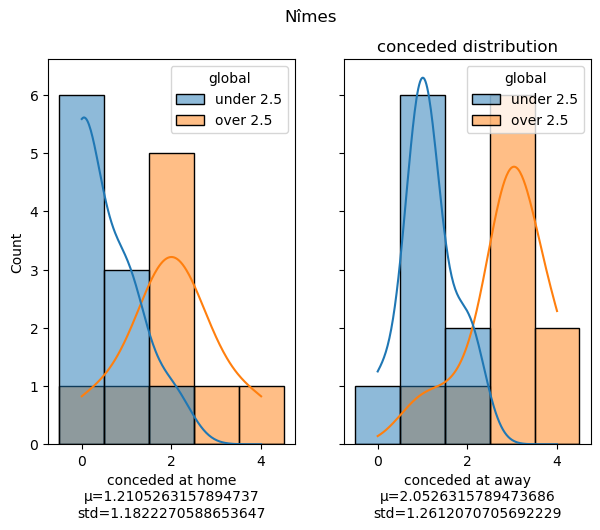

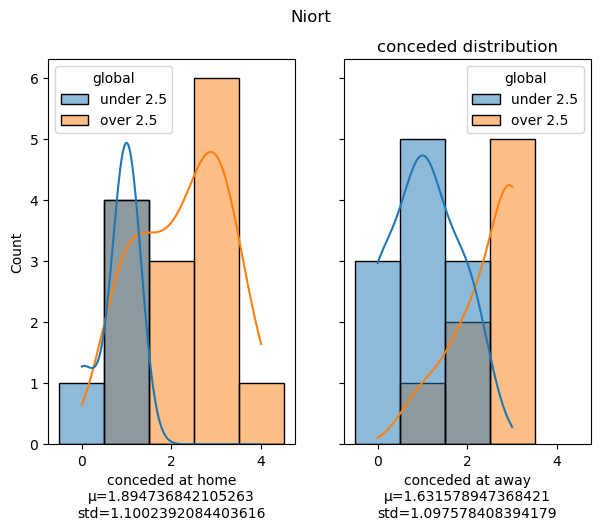

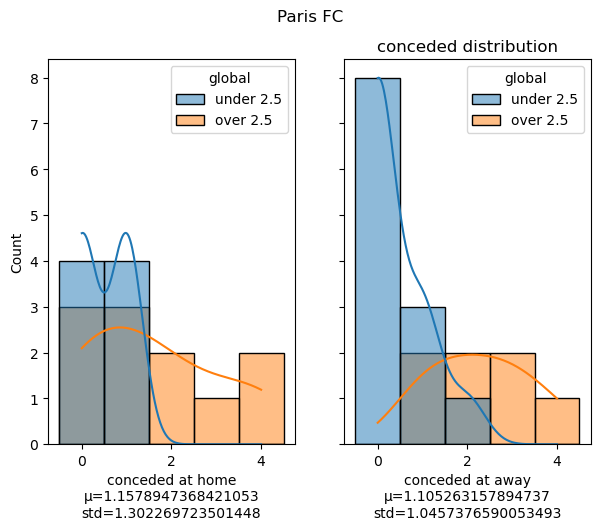

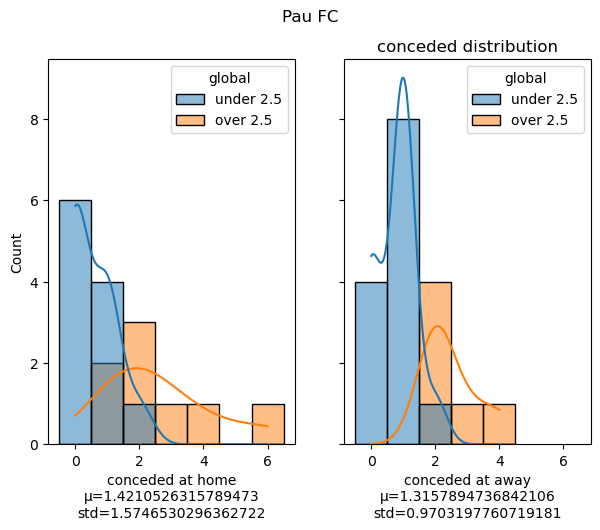

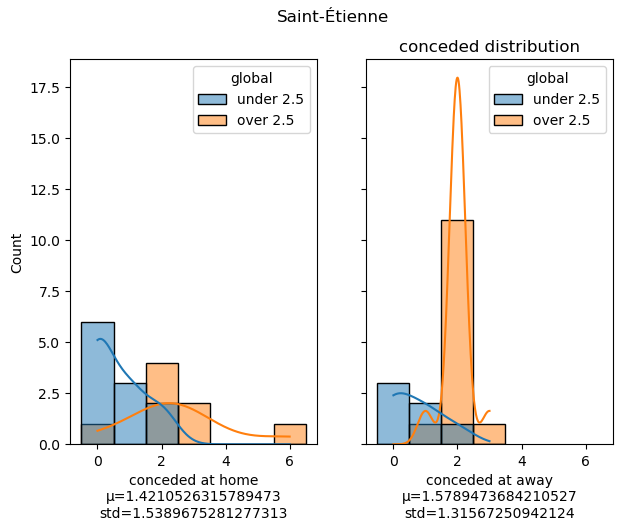

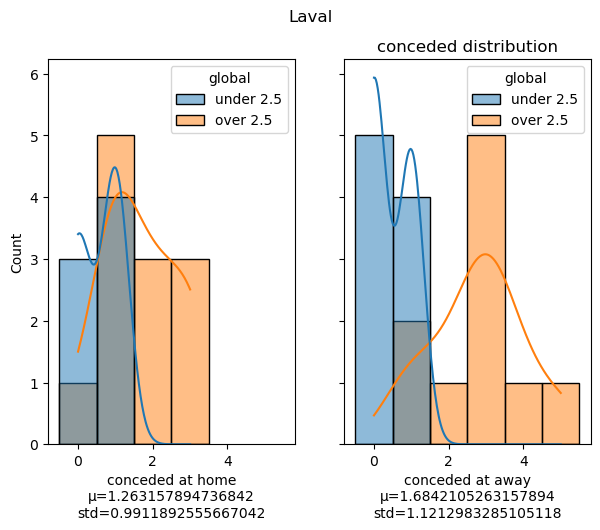

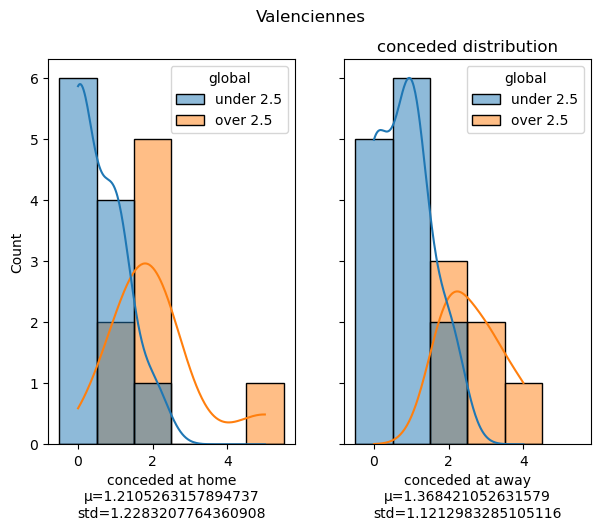

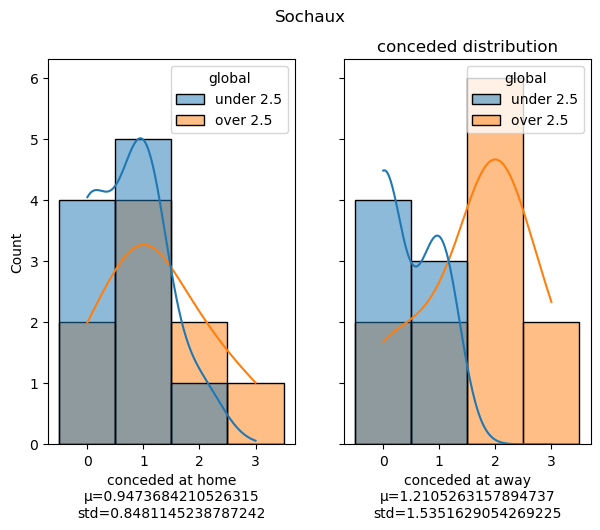

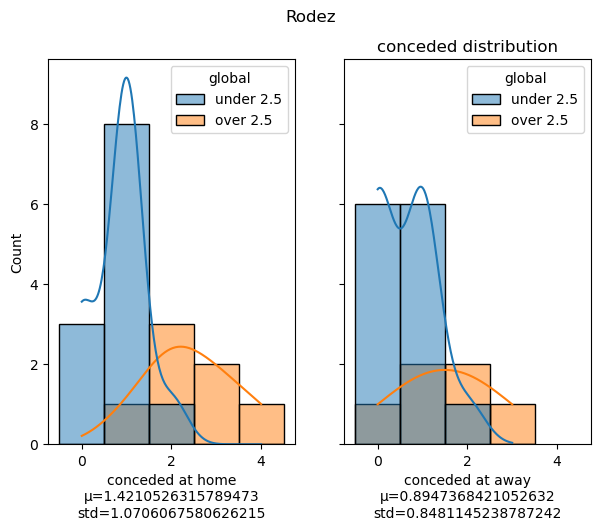

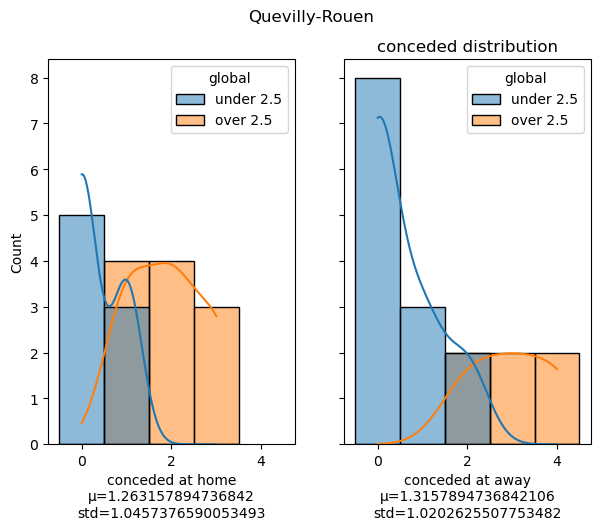

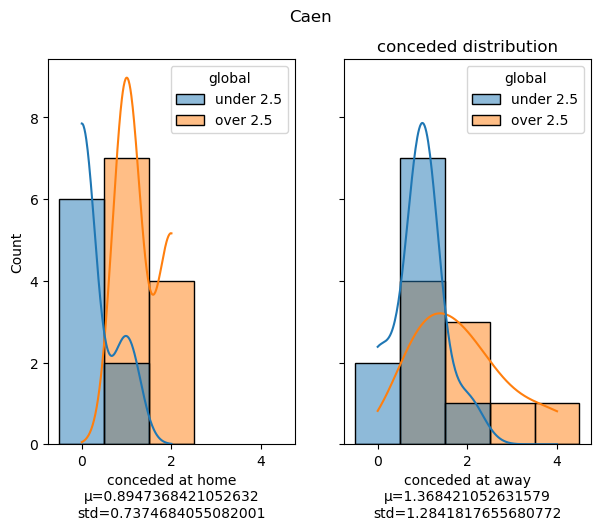

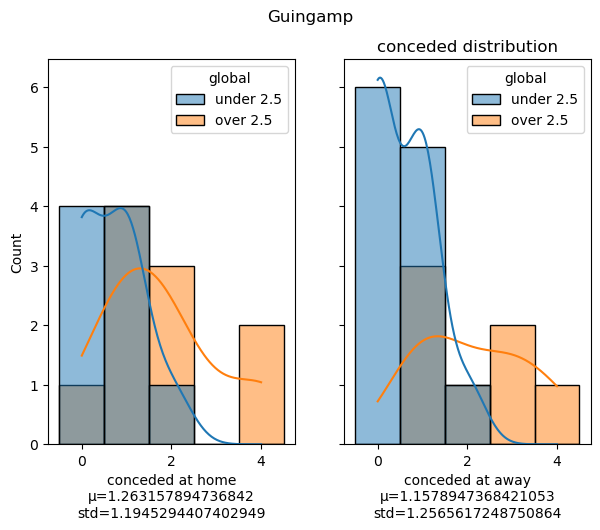

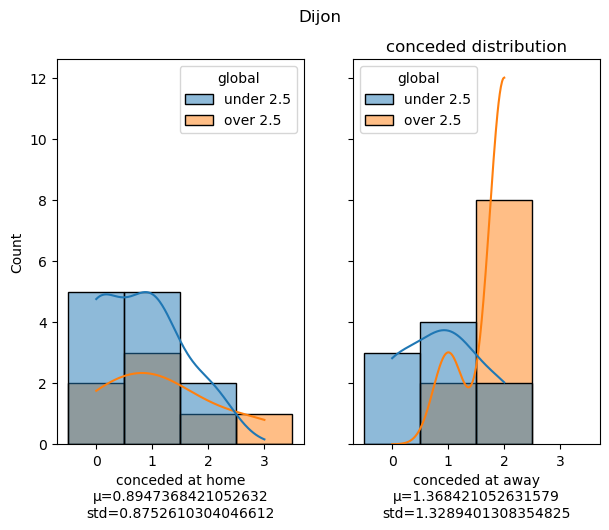

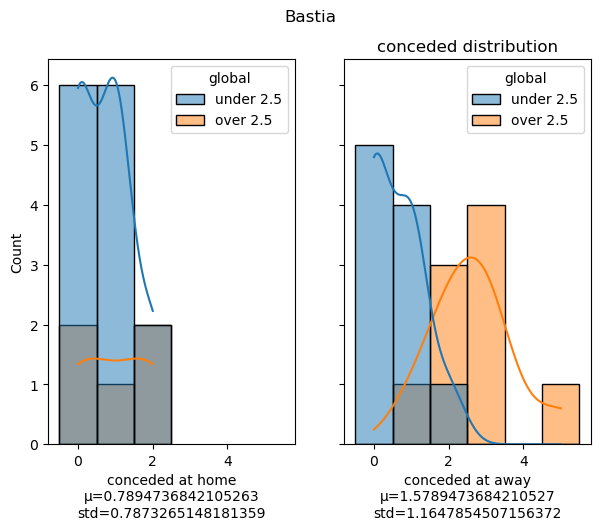

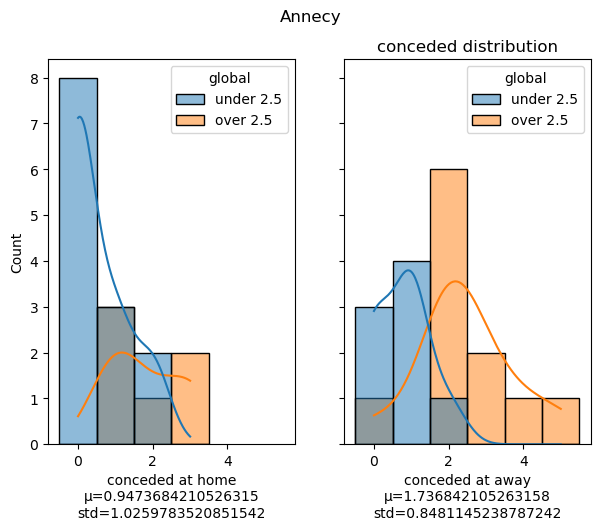

In [ ]:
for team in df.home_team.unique():
    feature_viz(team, feature='conceded')

### Interpretation
At first sight, we can see that it is difficult to find the pattern behind the distribution and the predicted class, however it's obvious that the class we need to predict depend of the scored & conceded goal by each team in the match.

## Target / Feature relationship

In [ ]:
def rel_feature(team, feature):
    """Observe la rélation entre la target et `feature`

    Args:
        team (str): Nom de l'équipe à étudier
        feature (str): Nom de la variable a visualiser
    """
    home = df[df['home_team']==team]
    away = df[df['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7, 5))
    sns.scatterplot(data=home, x=home['global'], y=home[f'home_team_{feature}'], hue=home['global_class'],
                    ax=axs[0])
    axs[0].set_xlabel('global at home')
    axs[0].set_ylabel(f'{feature} at home')
    sns.scatterplot(data=away, x=away['global'], y=away[f'away_team_{feature}'], hue=away['global_class'],
                    ax=axs[1])
    axs[1].set_xlabel('global at away')
    axs[1].set_ylabel(f'{feature} at away')
    plt.title(team)
    plt.suptitle(f'Target / {feature} relationship')
    plt.show()

#### [ Target | Scored ]

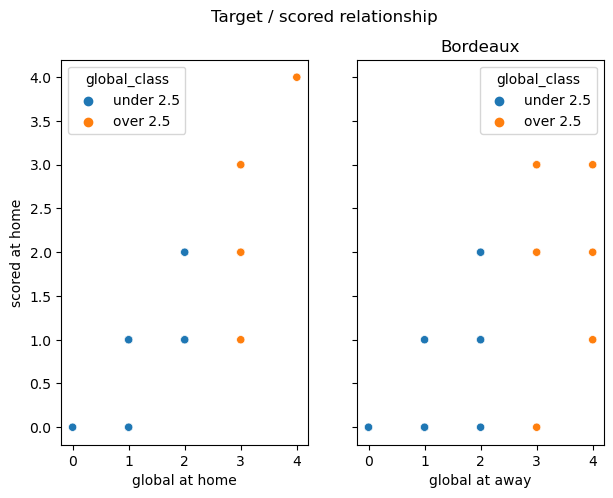

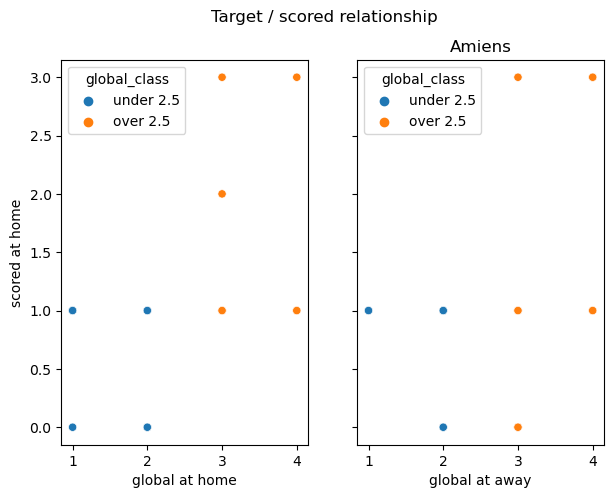

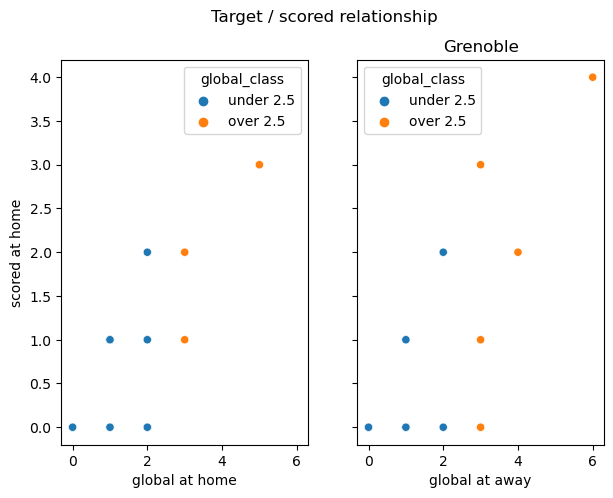

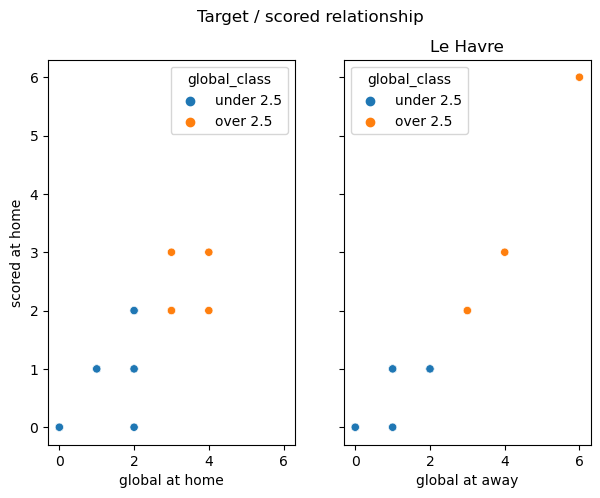

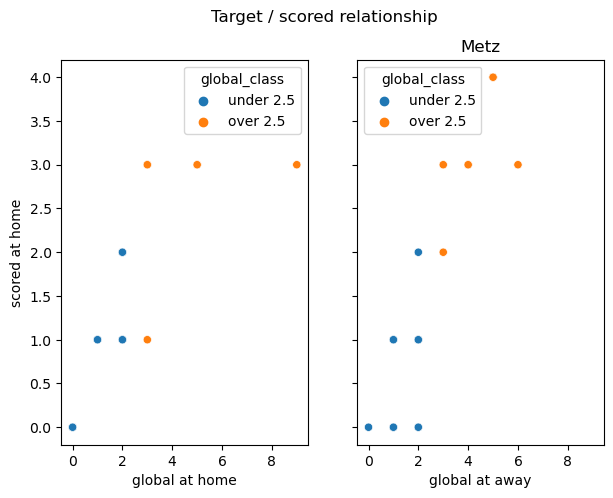

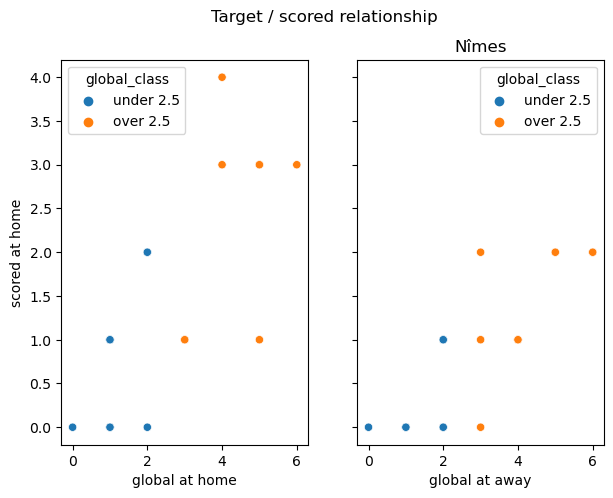

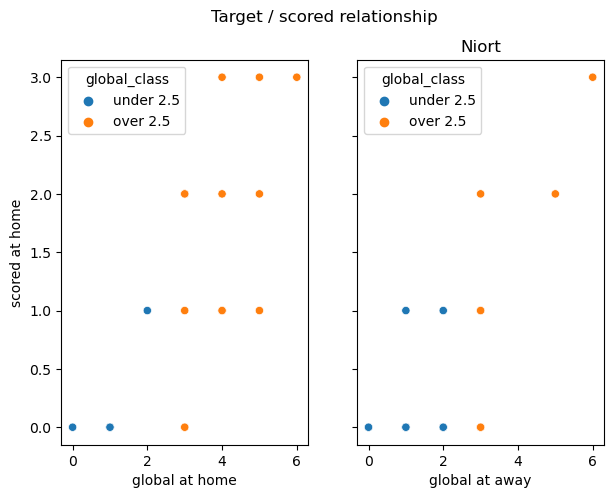

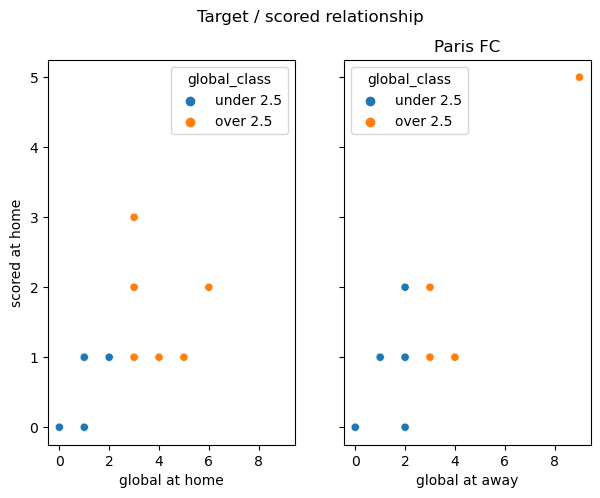

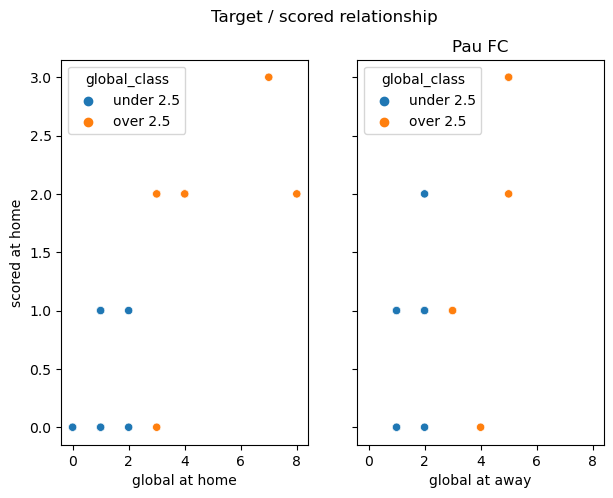

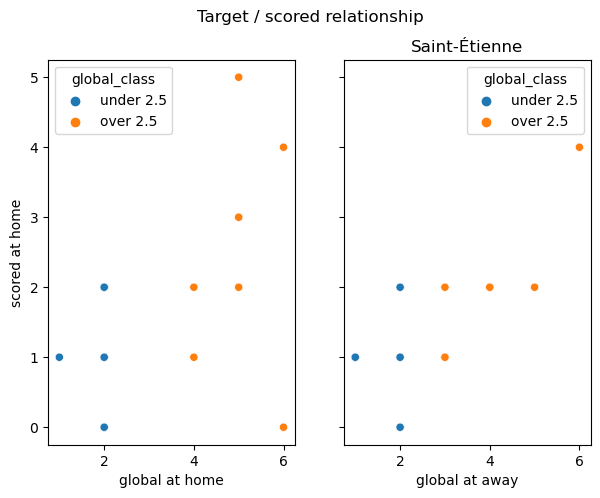

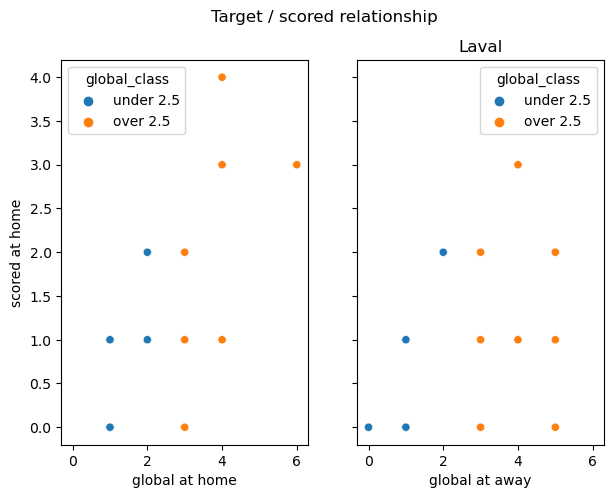

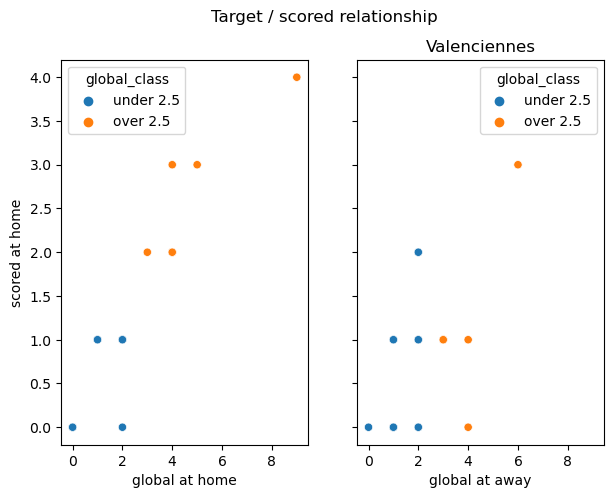

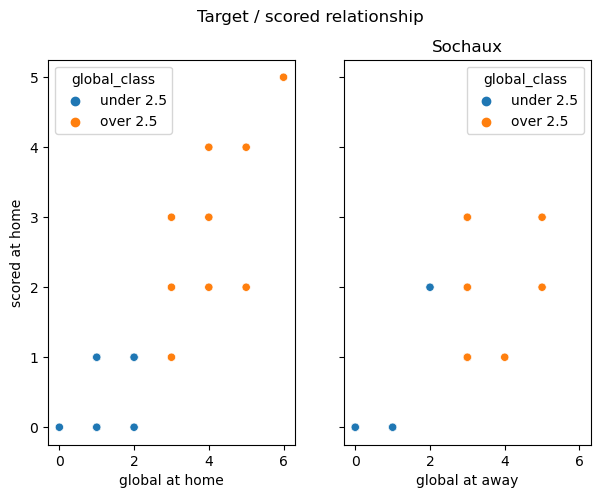

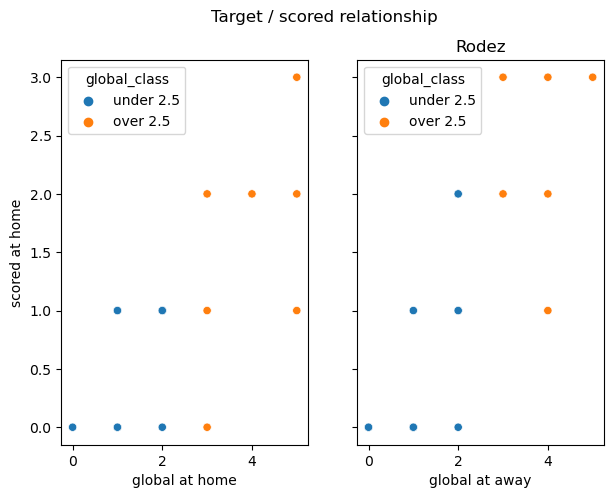

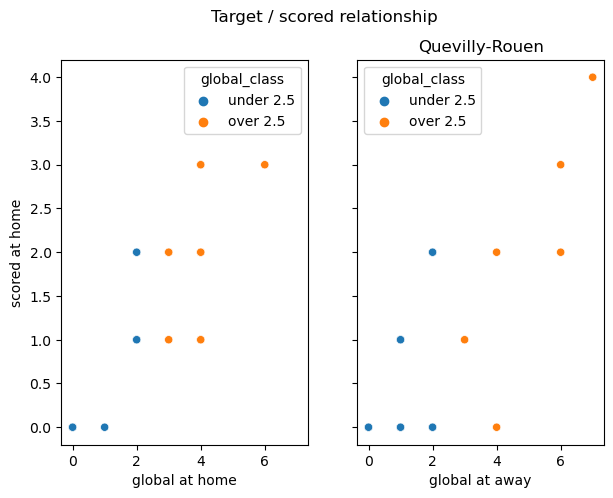

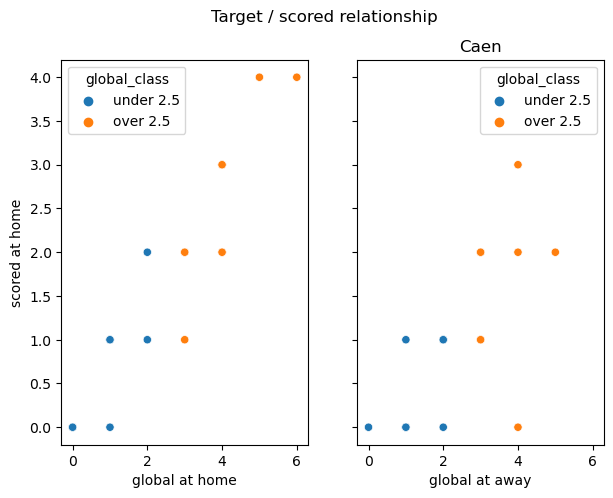

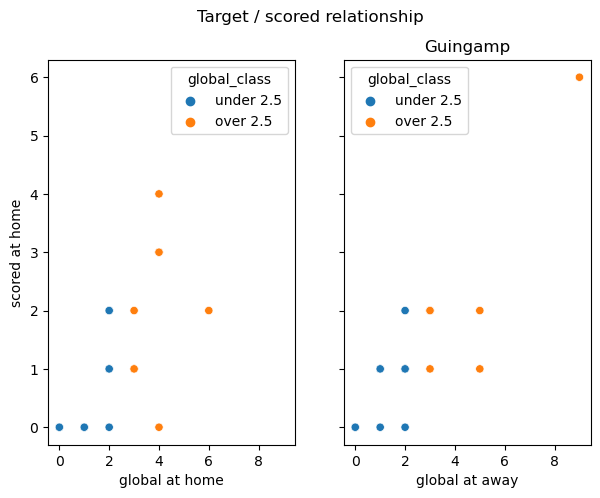

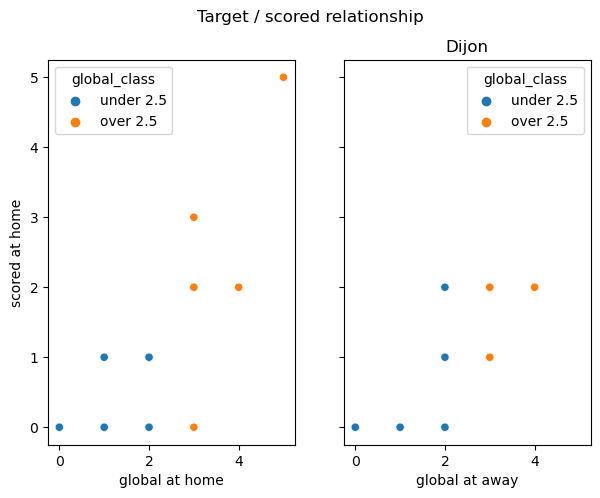

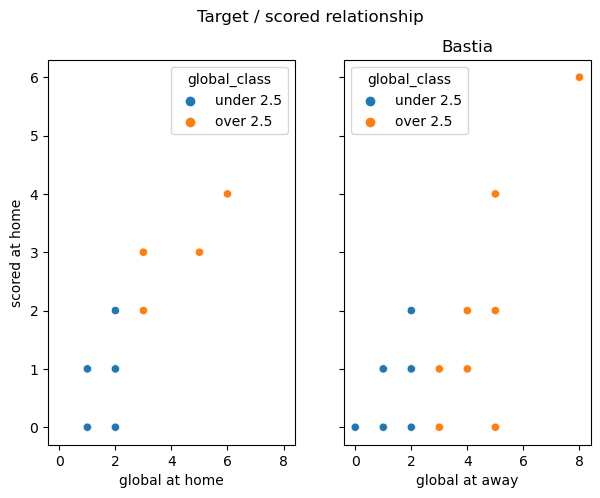

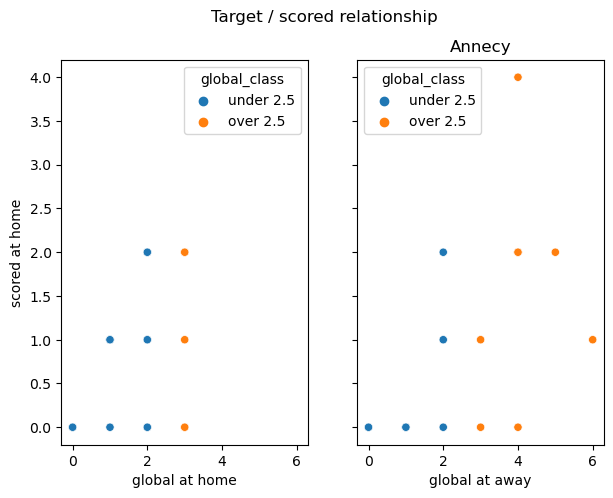

In [ ]:
for team in df.home_team.unique():
    rel_feature(team, feature='scored')

#### [ Target | Conceded ]

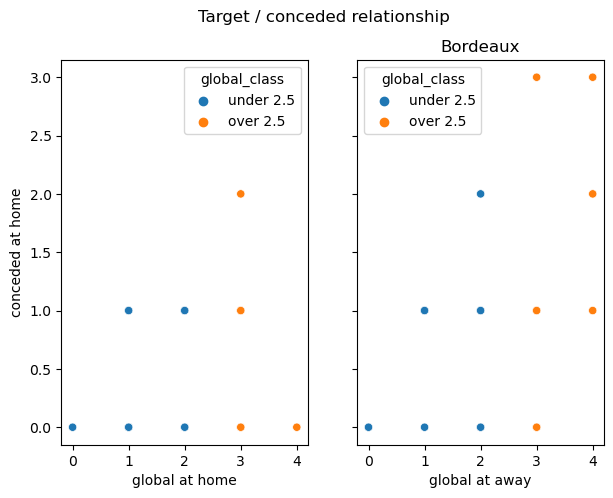

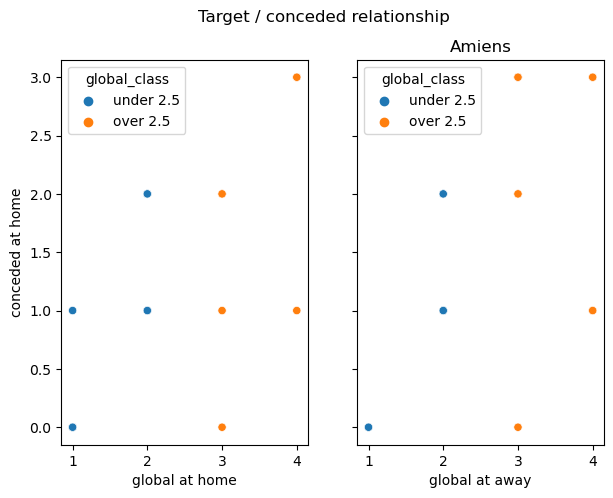

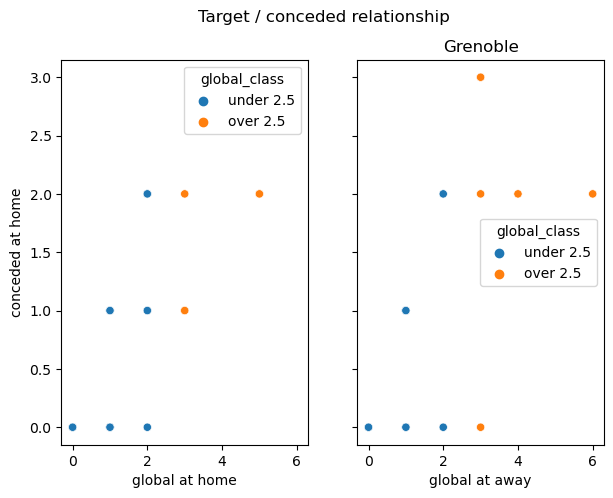

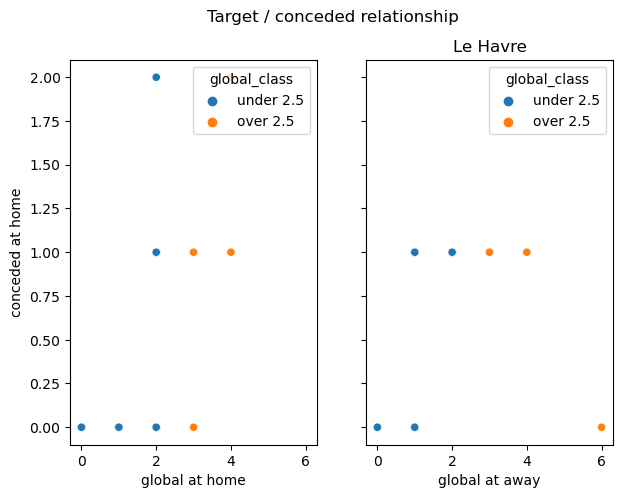

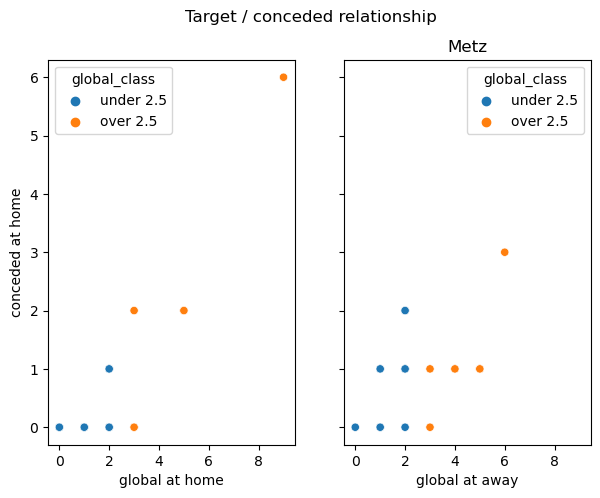

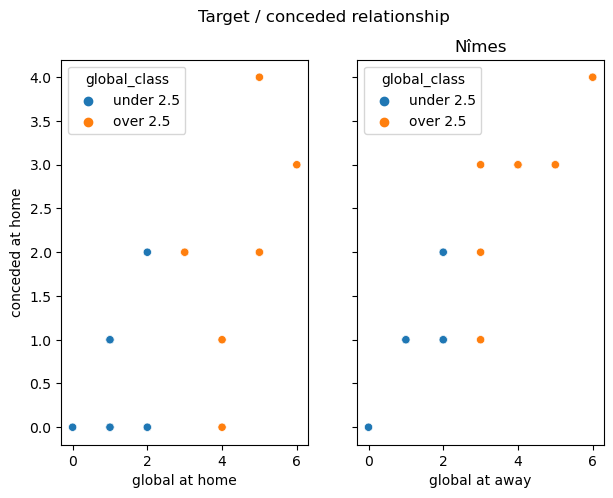

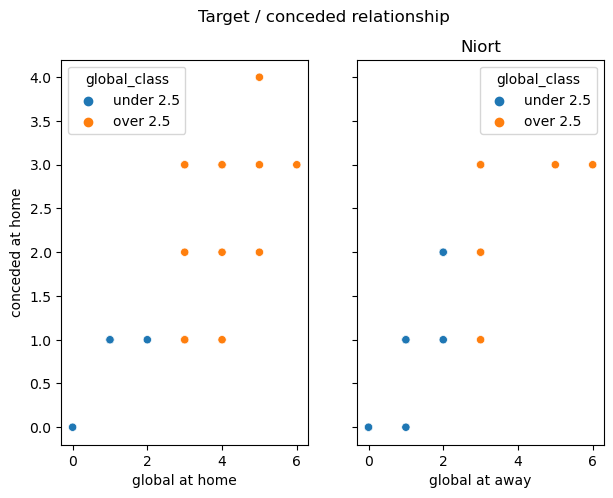

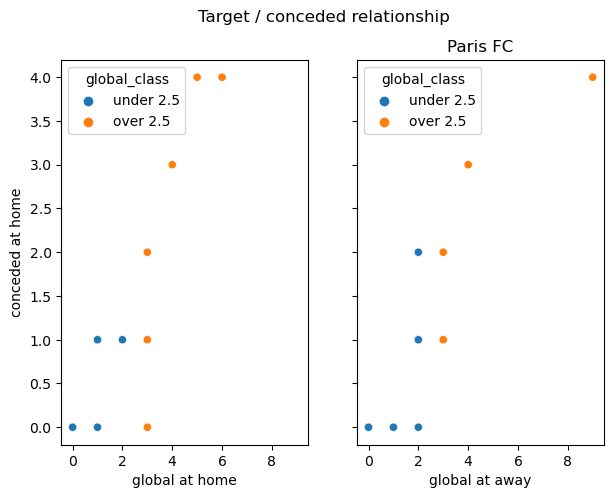

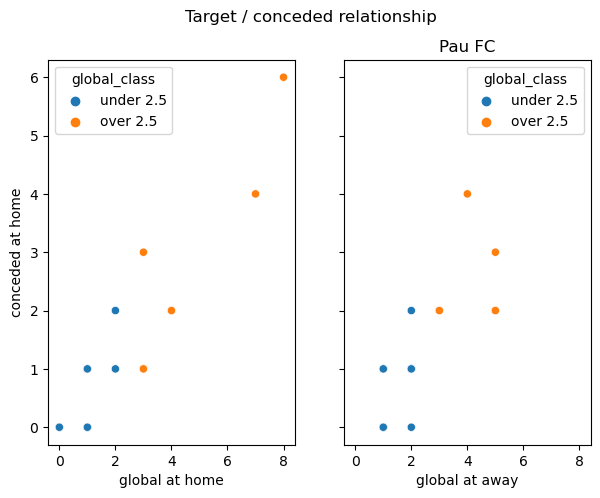

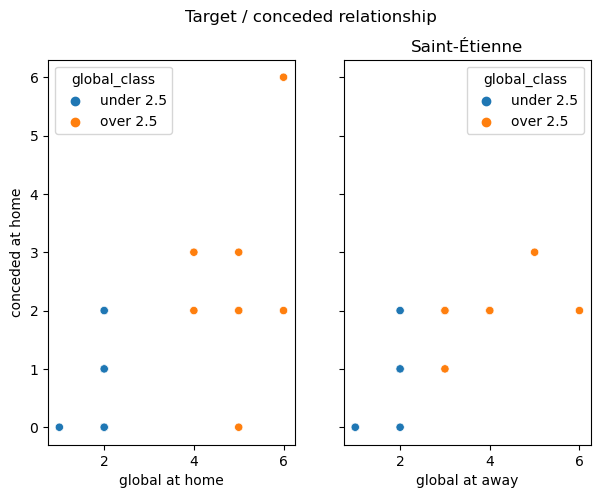

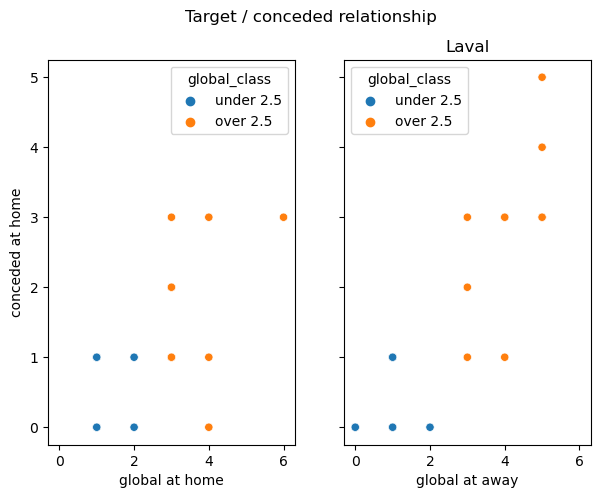

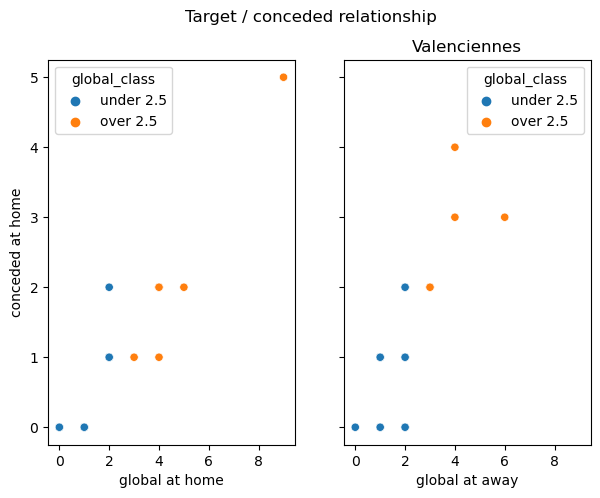

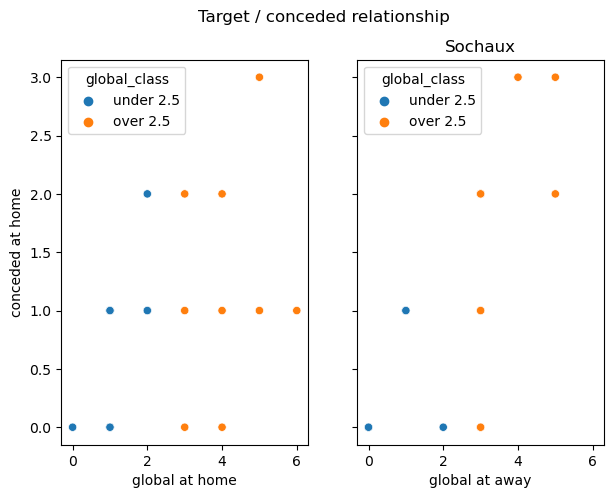

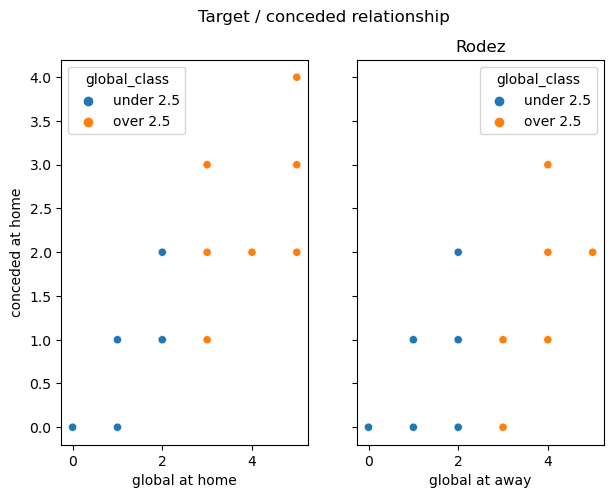

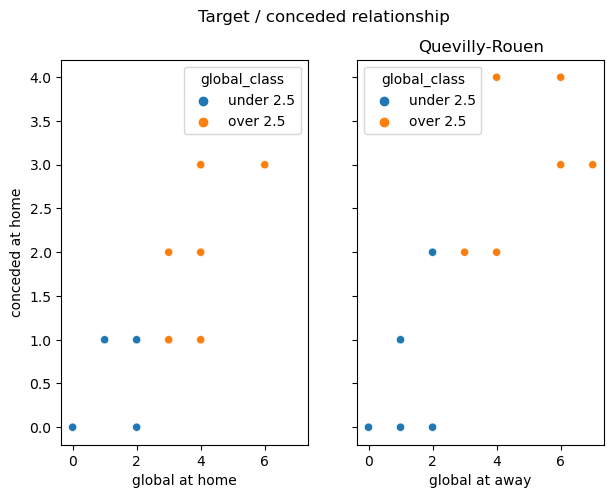

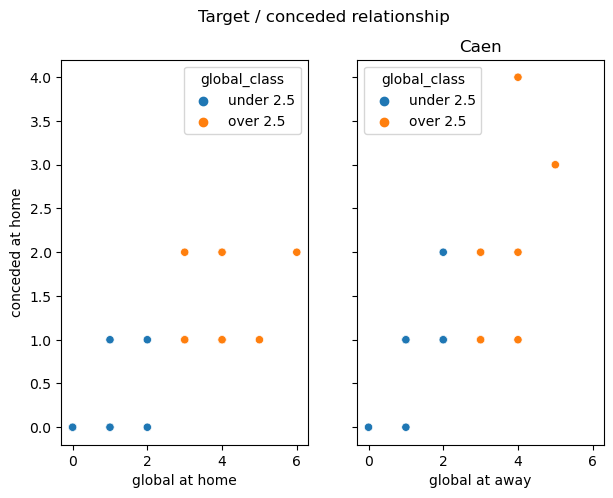

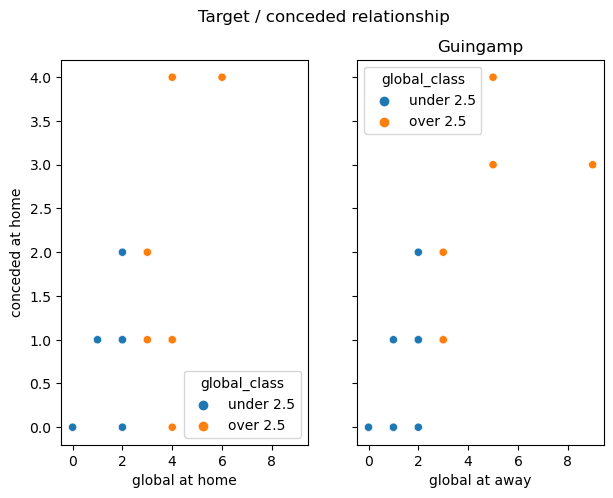

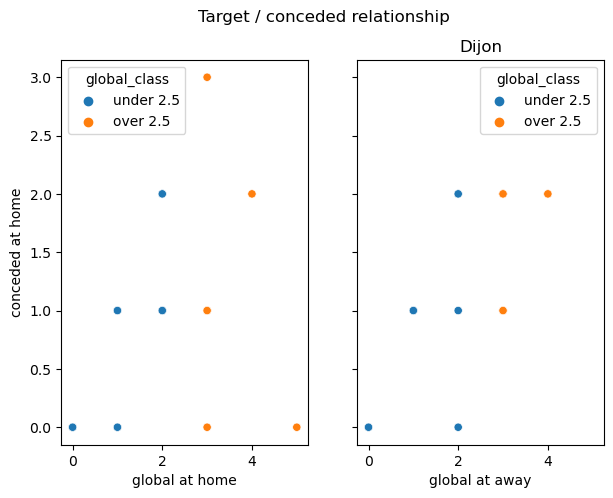

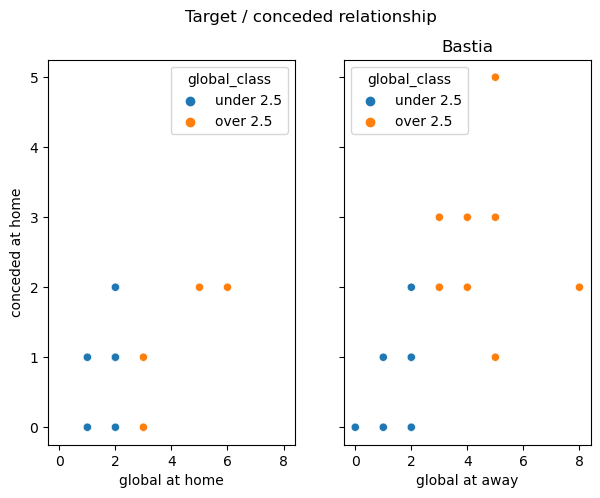

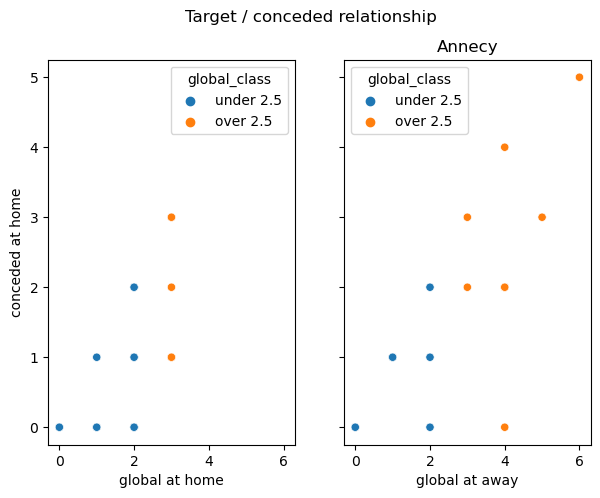

In [ ]:
for team in df.home_team.unique():
    rel_feature(team, feature='conceded')

### Interpretation
We can see that when the relationship between *Scored* and *Global* is correlated for a given team, the relationship between *Global* & *Conceded* is plus or moins null for that team and vice versa.

## Feature / Feature Relationship
### [lScored / Conceded ]

In [ ]:
def rel_ff(team):
    home = df[df['home_team']==team]
    away = df[df['away_team']==team]
    fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(7,5))
    sns.scatterplot(data=home, x=home['home_team_scored'], y=home['home_team_conceded'], ax=axs[0],
                    hue=home['global_class'])
    axs[0].set_xlabel('scored at home')
    axs[0].set_ylabel('conceded at home')
    sns.scatterplot(data=away, x=away['away_team_scored'], y=away['away_team_conceded'], ax=axs[1],
                    hue=away['global_class'])
    axs[1].set_xlabel('scored at away')
    axs[1].set_ylabel('conceded at away')
    plt.suptitle(team)
    plt.show()

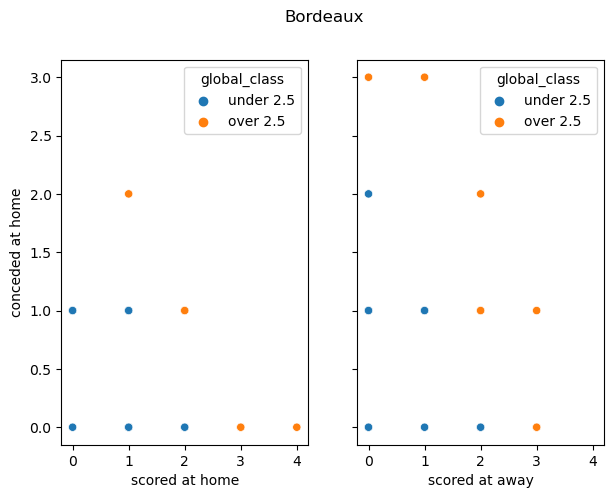

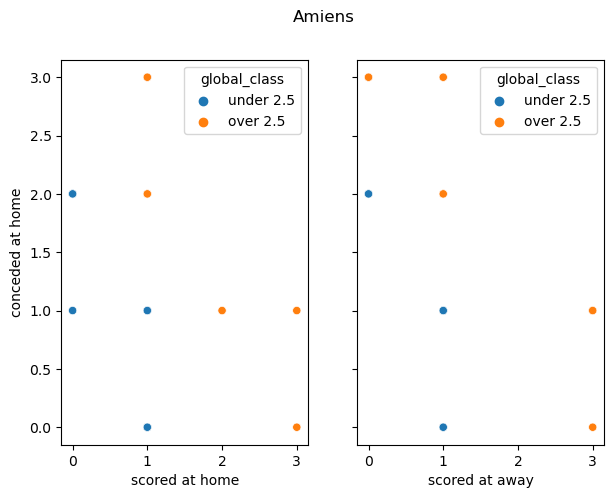

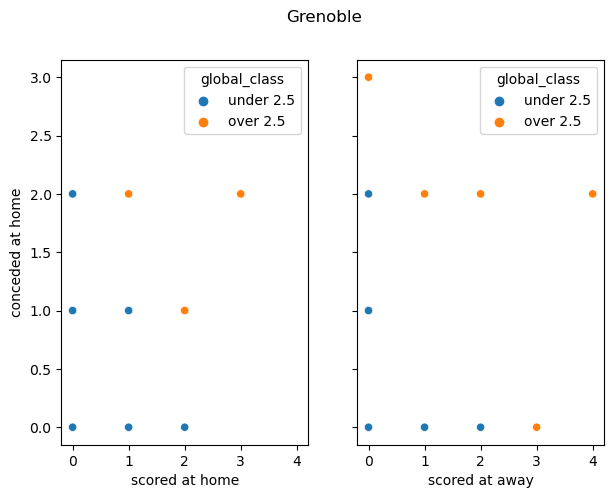

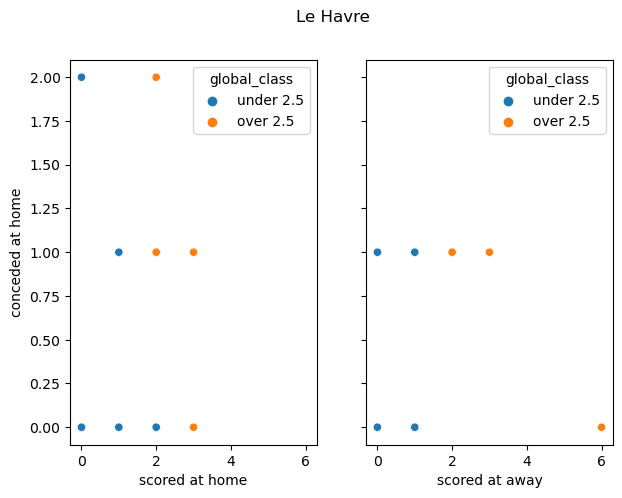

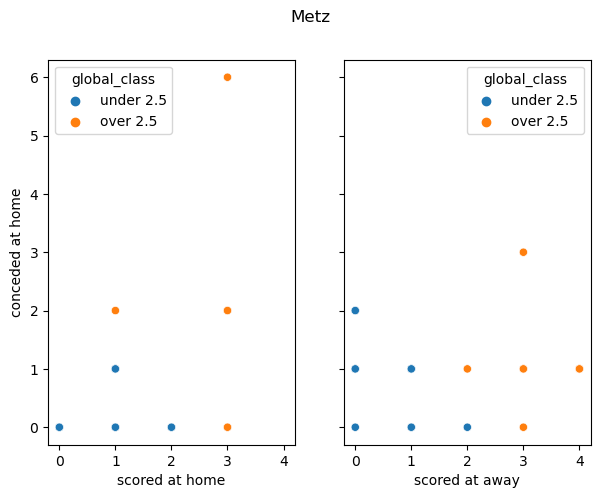

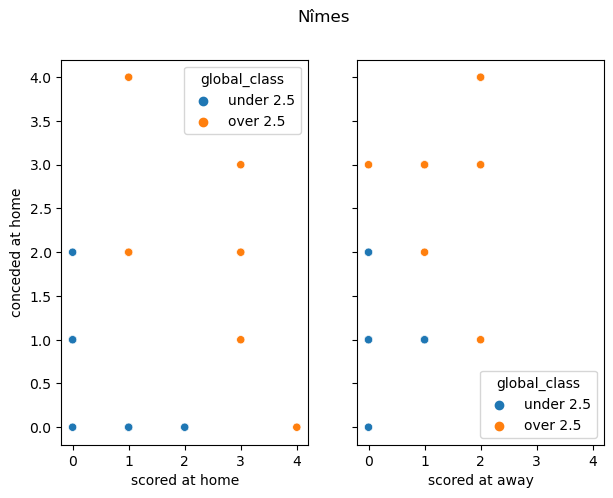

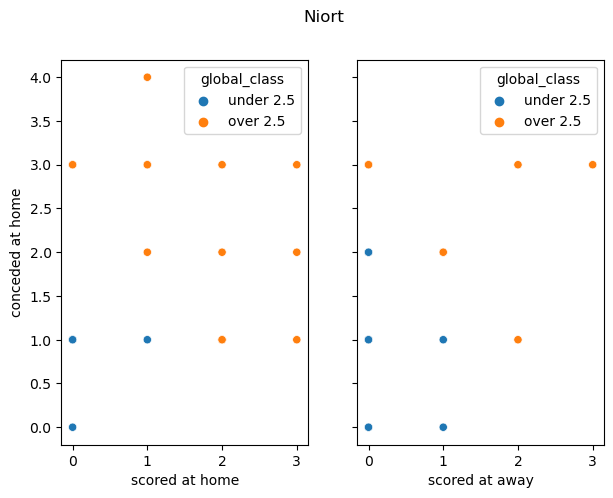

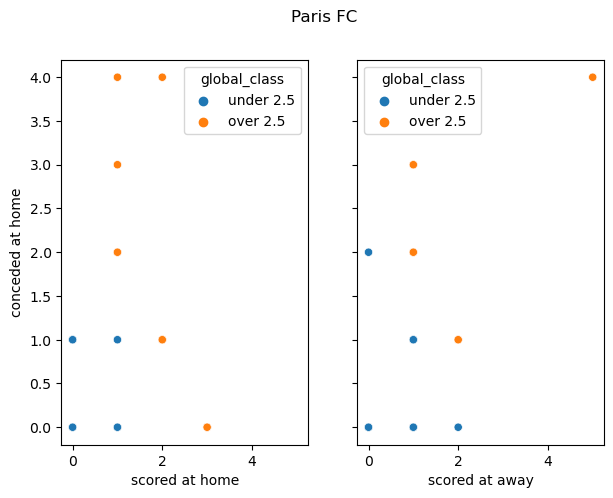

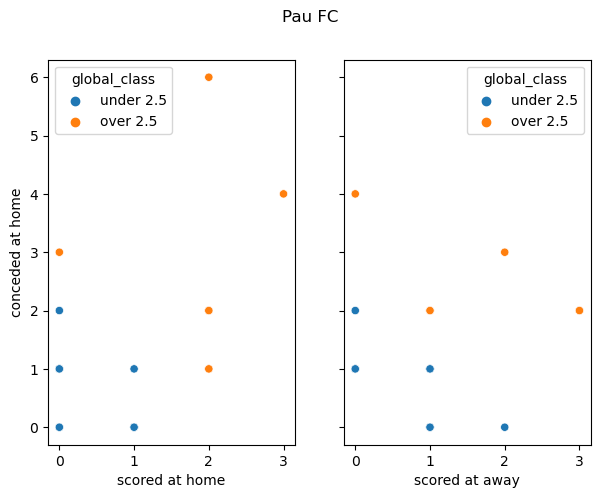

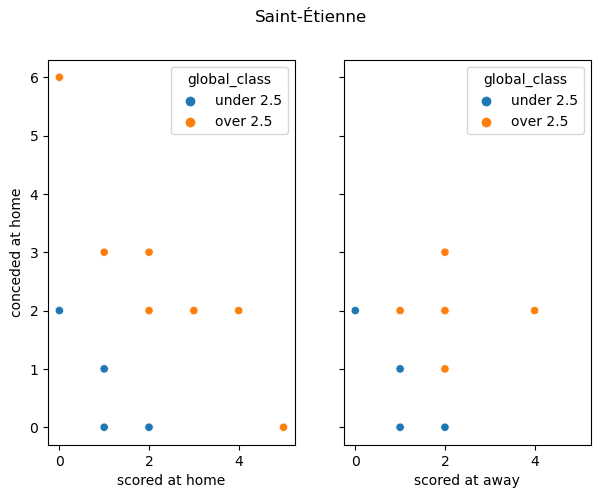

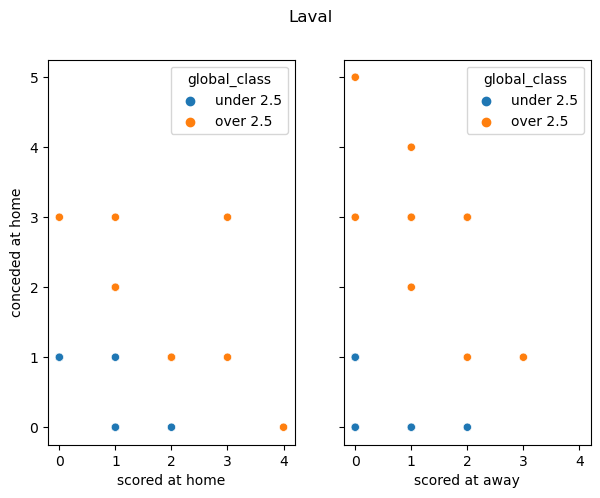

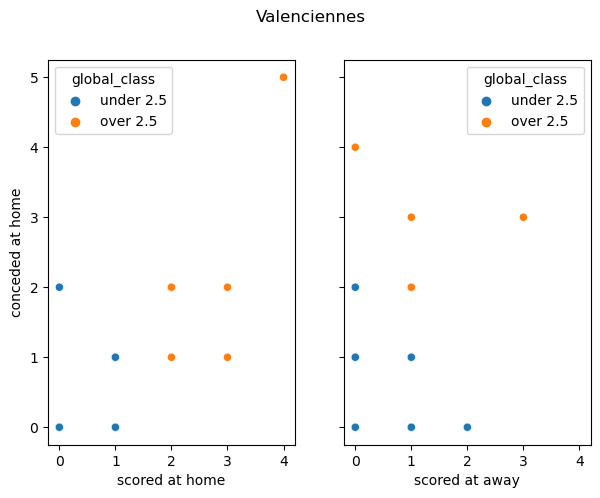

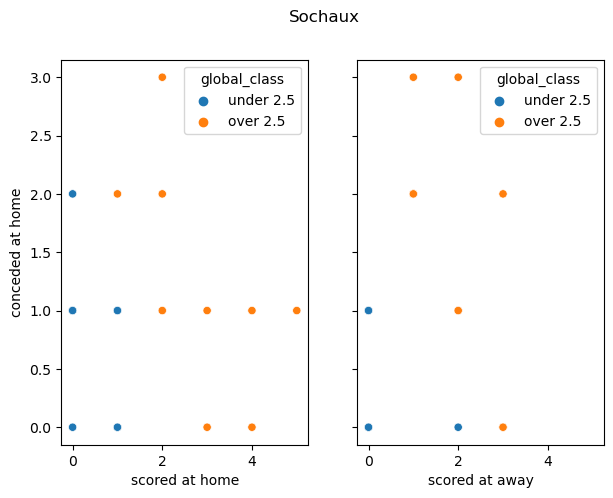

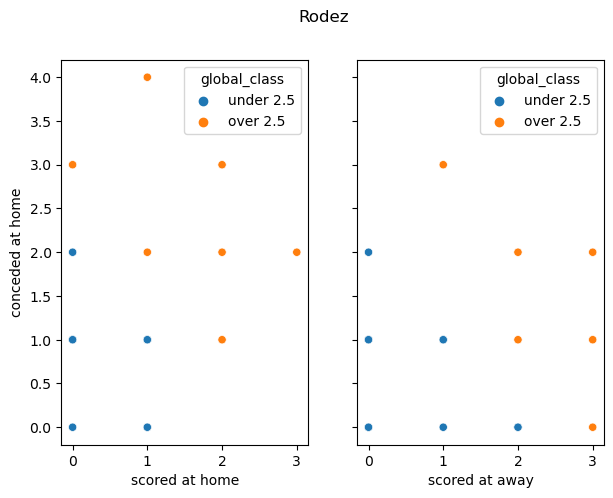

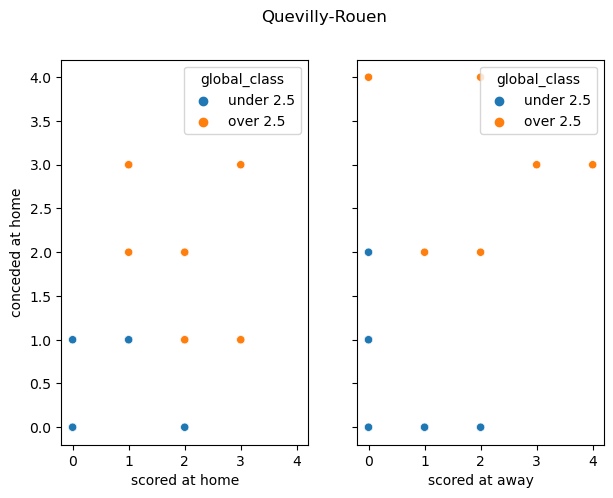

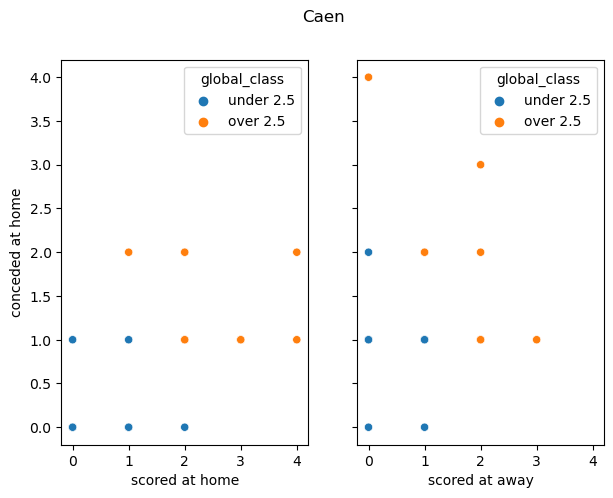

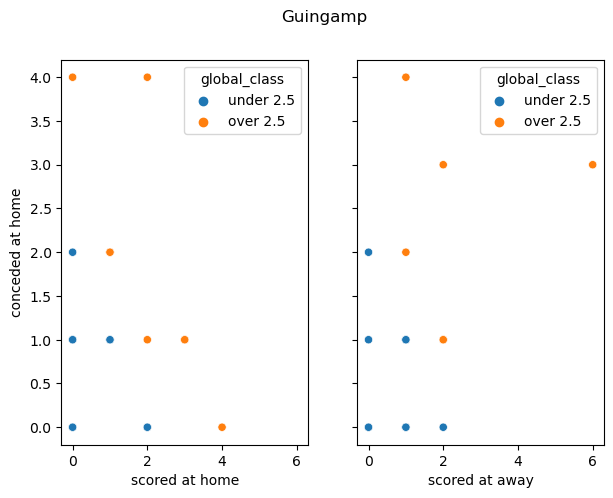

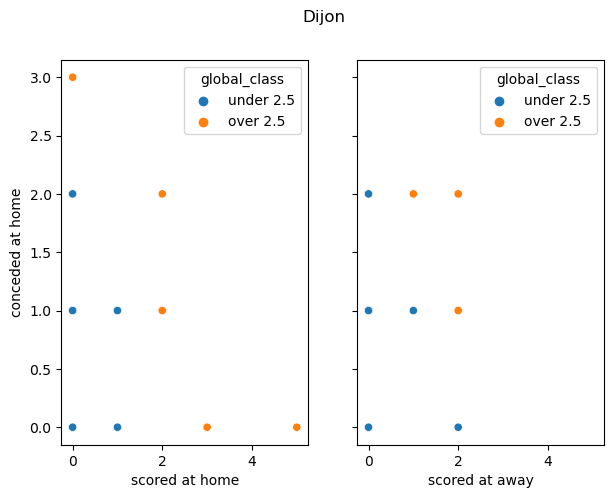

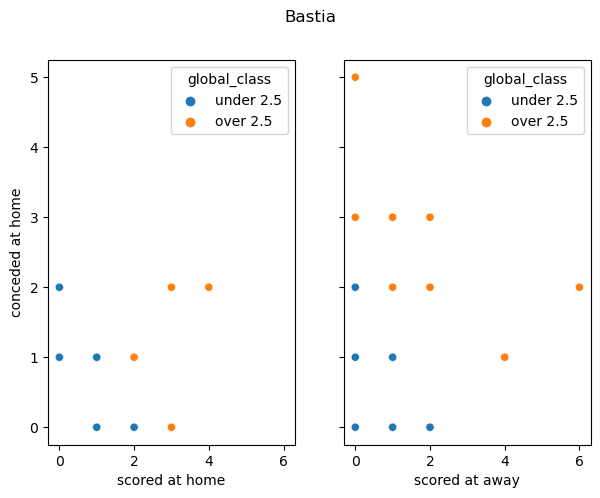

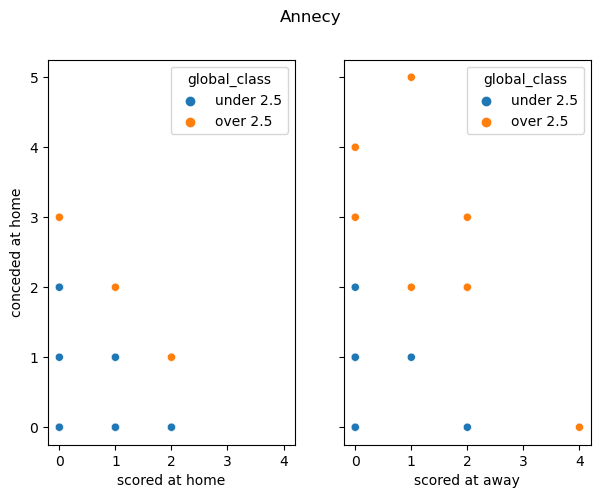

In [ ]:
for team in df.home_team.unique():
    rel_ff(team)


### Interpretation
Low correlation, negative between the goal scored by a team and the goal they conceded.

### Average observation (features)
As we can see that the global result depend of the goal scored and conceded by the stakeholder, 
we gonna plot on the graph, the average goal of each team and show some caracteristique.

In [23]:
at_home = df.groupby('home_team')[['home_team_scored', 'home_team_conceded']].mean()
at_away = df.groupby('away_team')[['away_team_scored', 'away_team_conceded']].mean()
overall = pd.concat([at_home, at_away], axis=1, ignore_index=False)
overall.rename(columns={"home_team_scored":"scored_at_home",
                        "home_team_conceded":"conceded_at_home",
                        "away_team_scored":"scored_at_away",
                        "away_team_conceded":"conceded_at_away"}, inplace=True)
overall.head(7)

scored_at_home  conceded_at_home  scored_at_away  conceded_at_away
Amiens          1.052632          1.157895        1.052632          1.578947
Annecy          0.947368          0.947368        1.105263          1.736842
Bastia          1.368421          0.789474        1.368421          1.578947
Bordeaux        1.473684          0.526316        1.210526          0.947368
Caen            1.736842          0.894737        1.000000          1.368421
Dijon           1.105263          0.894737        0.894737          1.368421
Grenoble        1.000000          0.842105        0.736842          1.052632

<Figure size 640x480 with 0 Axes>

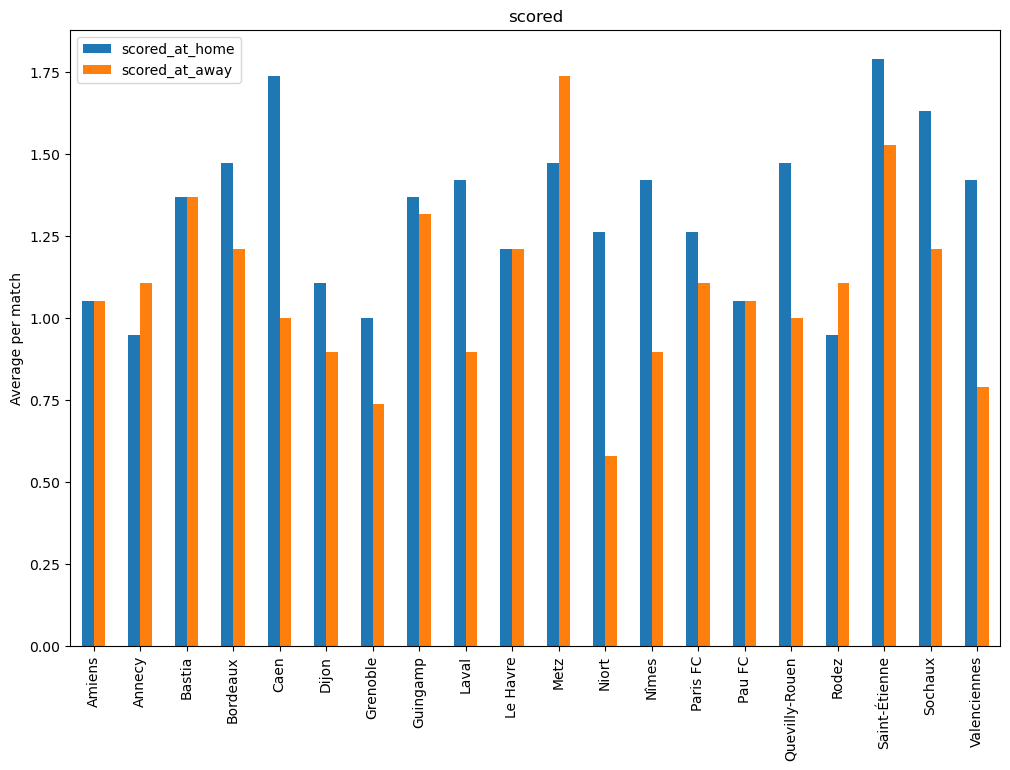

In [24]:
plt.figure()
fig = overall.drop(['conceded_at_home', 'conceded_at_away'], axis=1)
fig.plot.bar(figsize=(12, 8))
plt.ylabel('Average per match')
plt.title('scored')
plt.show()

<Figure size 640x480 with 0 Axes>

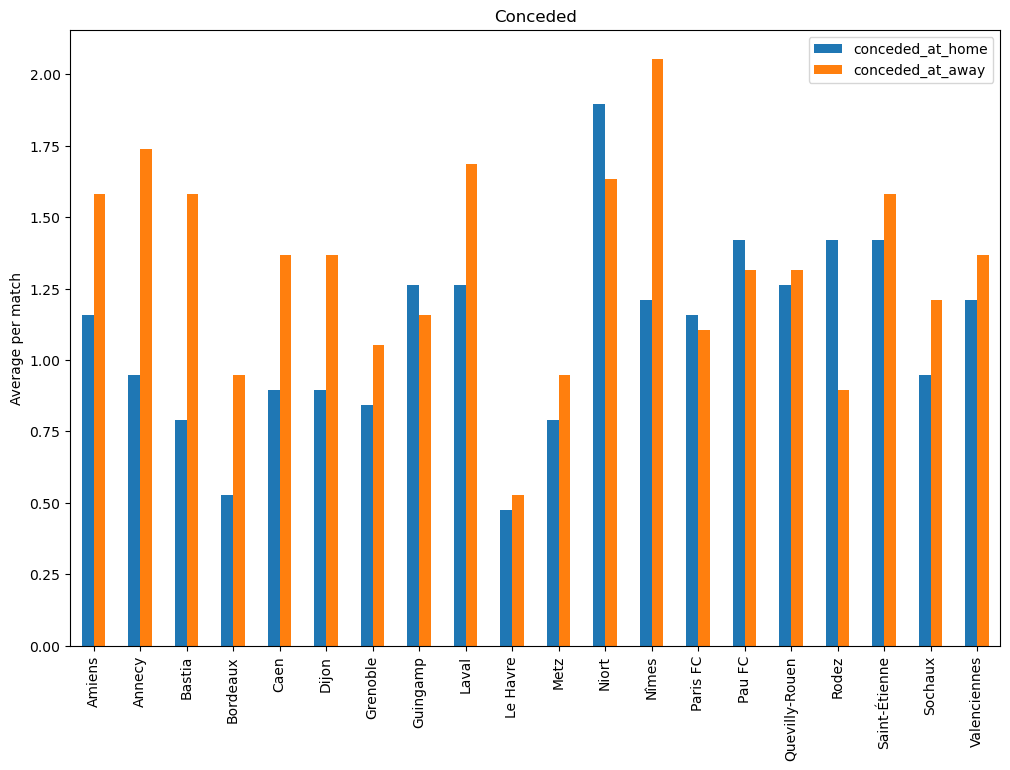

In [ ]:
plt.figure()
fig = overall.drop(['scored_at_home', 'scored_at_away'], axis=1)
fig.plot.bar(figsize=(12, 8))
plt.ylabel('Average per match')
plt.title('Conceded')
plt.show()

### Subsets creation
We gonna observe the rate under/over for each groupe.

In [25]:
strong_teams_at_home = overall[(overall.scored_at_home > 1.25) & (overall.conceded_at_home < 1)]
weak_teams_at_home = overall[(overall.scored_at_home < 1.25) & (overall.conceded_at_home > 1)]

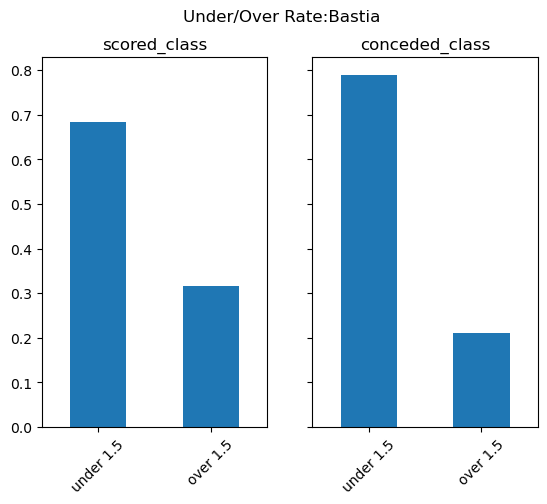

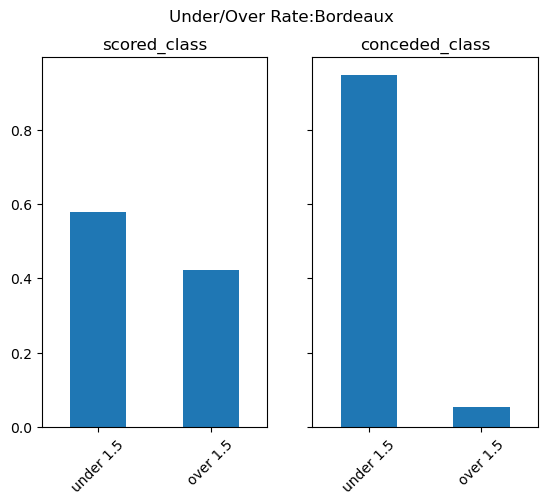

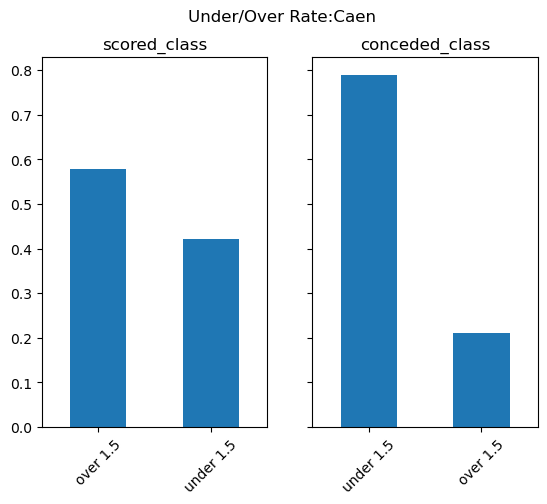

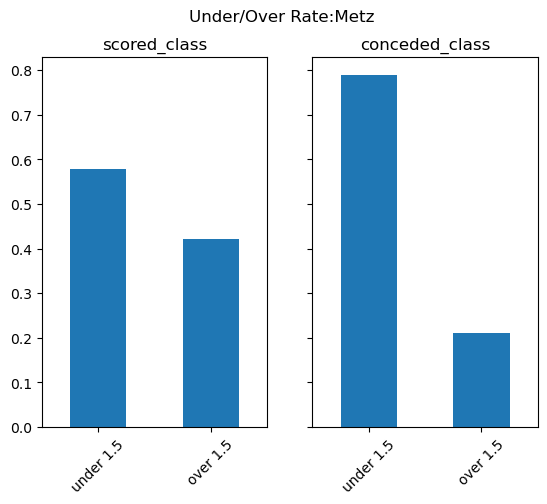

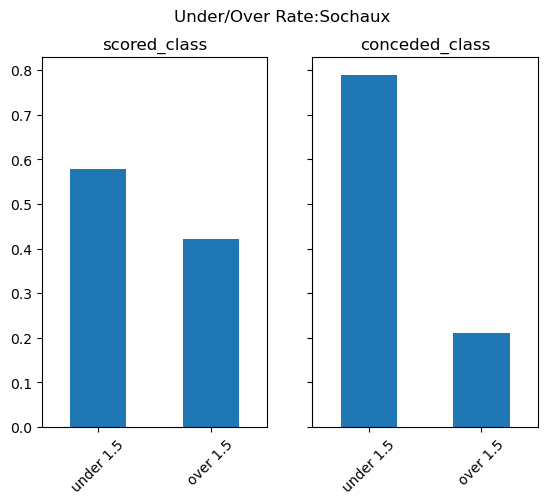

In [ ]:
for team in strong_teams_at_home.index:
    df_home = df[df['home_team']==team]
    df_home = df_home[['scored_class', 'conceded_class']]
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1 = df_home['scored_class'].value_counts(normalize=True).plot(kind='bar', ax=ax1, subplots=True, rot=45)
    ax2 = df_home['conceded_class'].value_counts(normalize=True).plot(kind='bar', ax=ax2, subplots=True, rot=45)
    plt.suptitle(f'Under/Over Rate:{team}')
    plt.show()

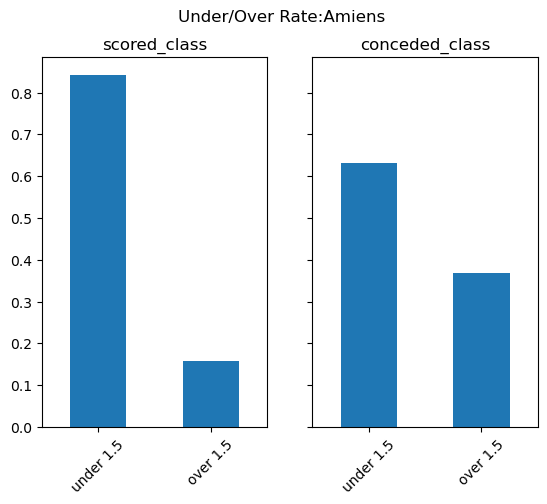

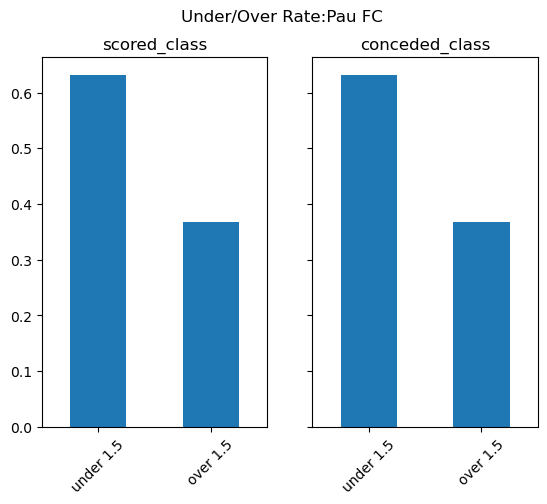

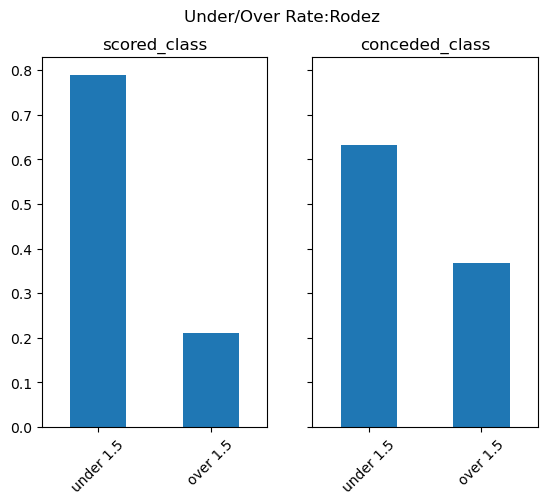

In [ ]:
for team in weak_teams_at_home.index:
    df_home = df[df['home_team']==team]
    df_home = df_home[['scored_class', 'conceded_class']]
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1 = df_home['scored_class'].value_counts(normalize=True).plot(kind='bar', ax=ax1, subplots=True, rot=45)
    ax2 = df_home['conceded_class'].value_counts(normalize=True).plot(kind='bar', ax=ax2, subplots=True, rot=45)
    plt.suptitle(f'Under/Over Rate:{team}')
    plt.show()

### Intrepretation
We can see that the classes distribution between our two groups are different.
We can use statistic test to check if this effect is statistically significant...\
Anyway, we cannot understand the causes behind this phenomen, cause we don't have in our dataset any explanatory variables.

### CONCLUSION
Throughout our analysis, we were able to observe from different angles, our few variables available, their distribution and characteristics.\
Theoretically, we could continue our EDA using certain techniques such as feature engineering for example, to create new explanatory variables with a certain predictive power. Given the nature of my features and the absence of any explanotory variable, the modeling approach that seems most interesting to us is the integrated self-regression methods such as ARIMA or VARIMA.